# MASINSKO UCENJE DRUGI PROJEKAT
---

*Nada Jovanovic 1618*  
*Milica Jovanovic 1636*


## Import
---

In [277]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

from numpy import mean
from numpy import std
from numpy import percentile

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score, adjusted_rand_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons

## Dataset
---

In [278]:
data = pd.read_csv("data.csv")
data = data.drop(columns = [data.columns[0]])

data1 = data.copy()

data.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0       noise        82990.0         89900.0             7.686318     4.0   
1  fire-boltt         3799.0         16999.0            77.651627     4.3   
2        boat         1999.0          7990.0            74.981227     3.8   
3  fire-boltt         1799.0         19999.0            91.004550     4.3   
4       noise         1599.0          4999.0            68.013603     4.1   

   Number OF Ratings                              Model Name Dial Shape  \
0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN   
1            20788.0                                  BSW046        NaN   
2            21724.0                               Wave Call        NaN   
3            13244.0                                  BSW053        NaN   
4            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   

  Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0         NaN            NaN         NaN                  8.0       Yes   
1         NaN        Silicon         Yes                  3.5       Yes   
2         NaN        Silicon         Yes                  8.0       Yes   
3         NaN        Silicon         Yes                  3.5       Yes   
4         NaN          Other         Yes                  8.0       Yes   

  Display Size     Weight  
0          NaN  35 - 50 g  
1   1.8 inches  50 - 75 g  
2   1.7 inches  35 - 50 g  
3   1.8 inches      75g +  
4   1.7 inches  35 - 50 g

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         420 non-null    object 
 14  Weight               264 non-null    object 
dtypes: float64(6), object(9)
memory usage: 5

In [280]:
data.describe()

Current Price  Original Price  Discount Percentage      Rating  \
count     440.000000      377.000000           377.000000  444.000000   
mean    12747.554545    14598.204244            48.236894    4.031306   
std     17760.666099    15450.028869            24.109830    0.550548   
min      1199.000000     1669.000000           -79.688436    1.000000   
25%      2180.750000     5999.000000            33.337037    3.900000   
50%      3999.000000     7999.000000            54.550414    4.100000   
75%     17121.750000    17999.000000            66.677780    4.300000   
max    139990.000000    96390.000000            91.004550    5.000000   

       Number OF Ratings  Battery Life (Days)  
count         391.000000           418.000000  
mean        11594.726343            14.077392  
std         40423.889227             7.718503  
min             1.000000             0.750000  
25%            68.500000             8.000000  
50%           996.000000            17.500000  
75%          6022.000000            22.000000  
max        619130.000000            22.000000

## Vizuelizacija podataka
---


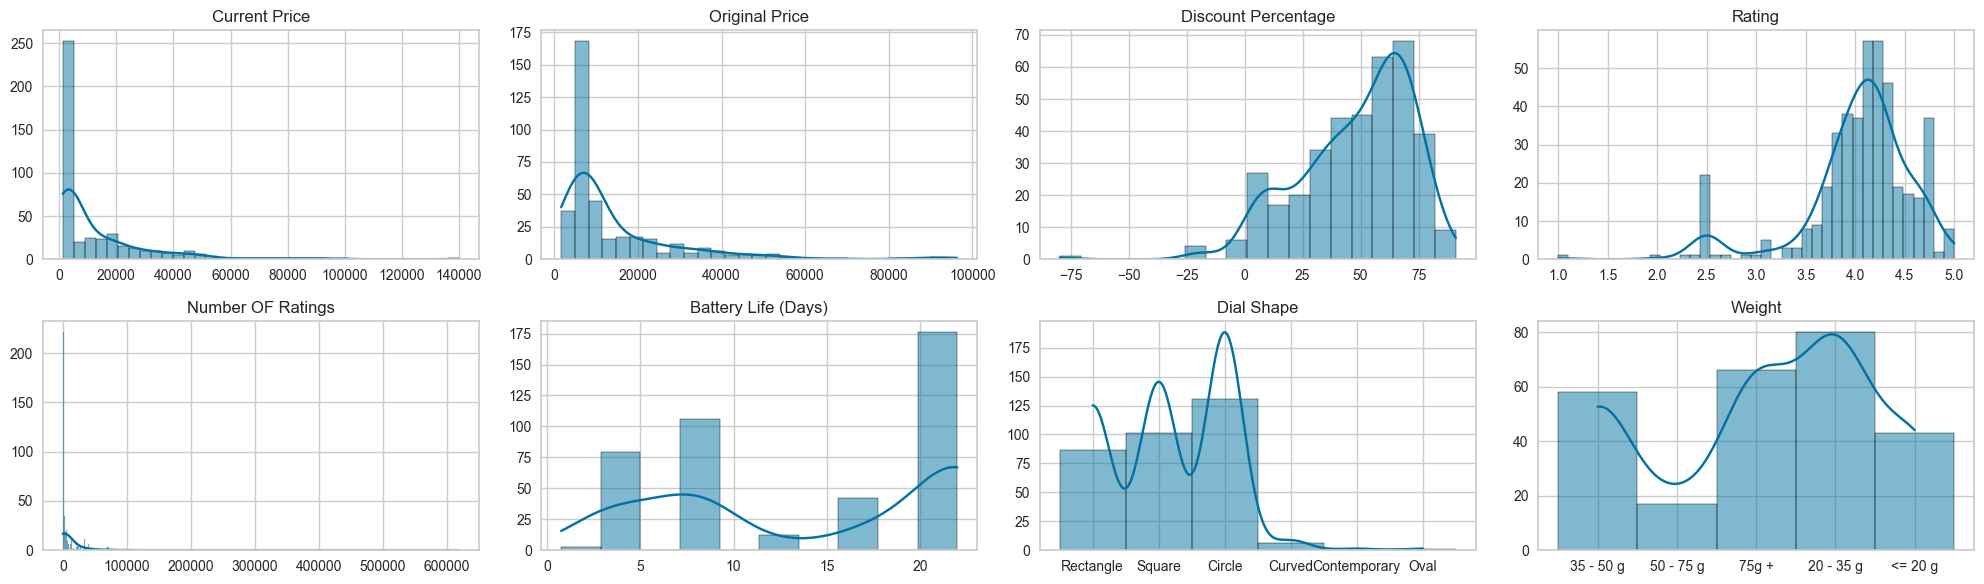

In [281]:
columns_num = ['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings','Battery Life (Days)', 'Dial Shape', 'Weight']

fig, axes = plt.subplots(2, 4, figsize=(20, 6))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

Moze se uociti da **Current Price**, **Original Price** i **Number OF Rating** imaju neke ekstremne vrednosti koje bi mozda trebalo ukloniti, dok **Discount percentage** sadrzi negetivne vrednosti koje treba prebaciti u pozitivne.

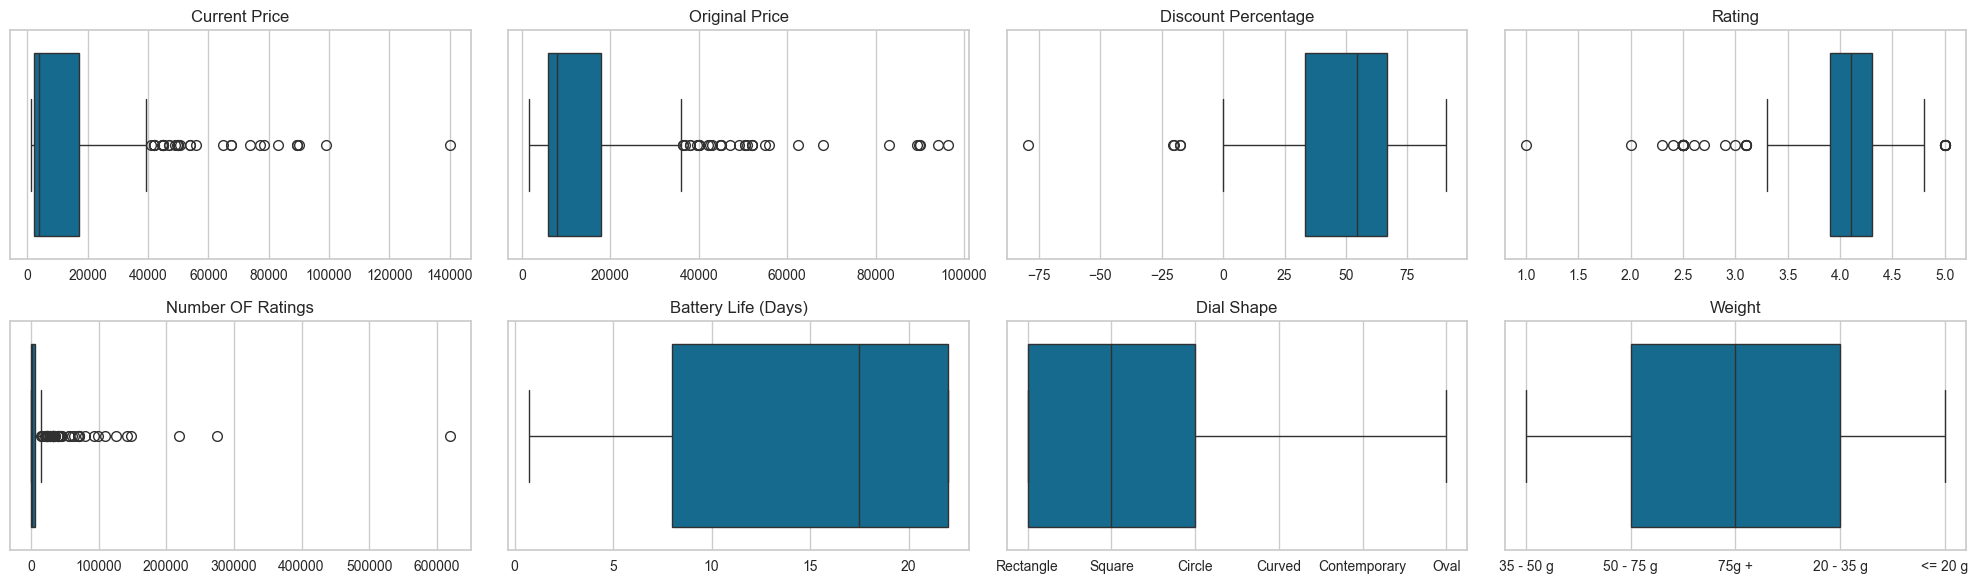

In [282]:

columns_num = ['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings','Battery Life (Days)', 'Dial Shape', 'Weight']

fig, axes = plt.subplots(2, 4, figsize=(20, 6))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.boxplot( x=column_name,  ax=axes[i], data=data)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()


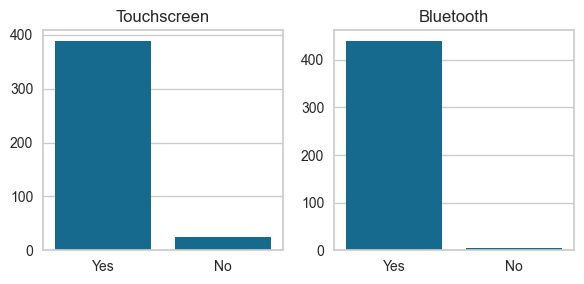

In [283]:
columns_num = ['Touchscreen', 'Bluetooth']

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.countplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

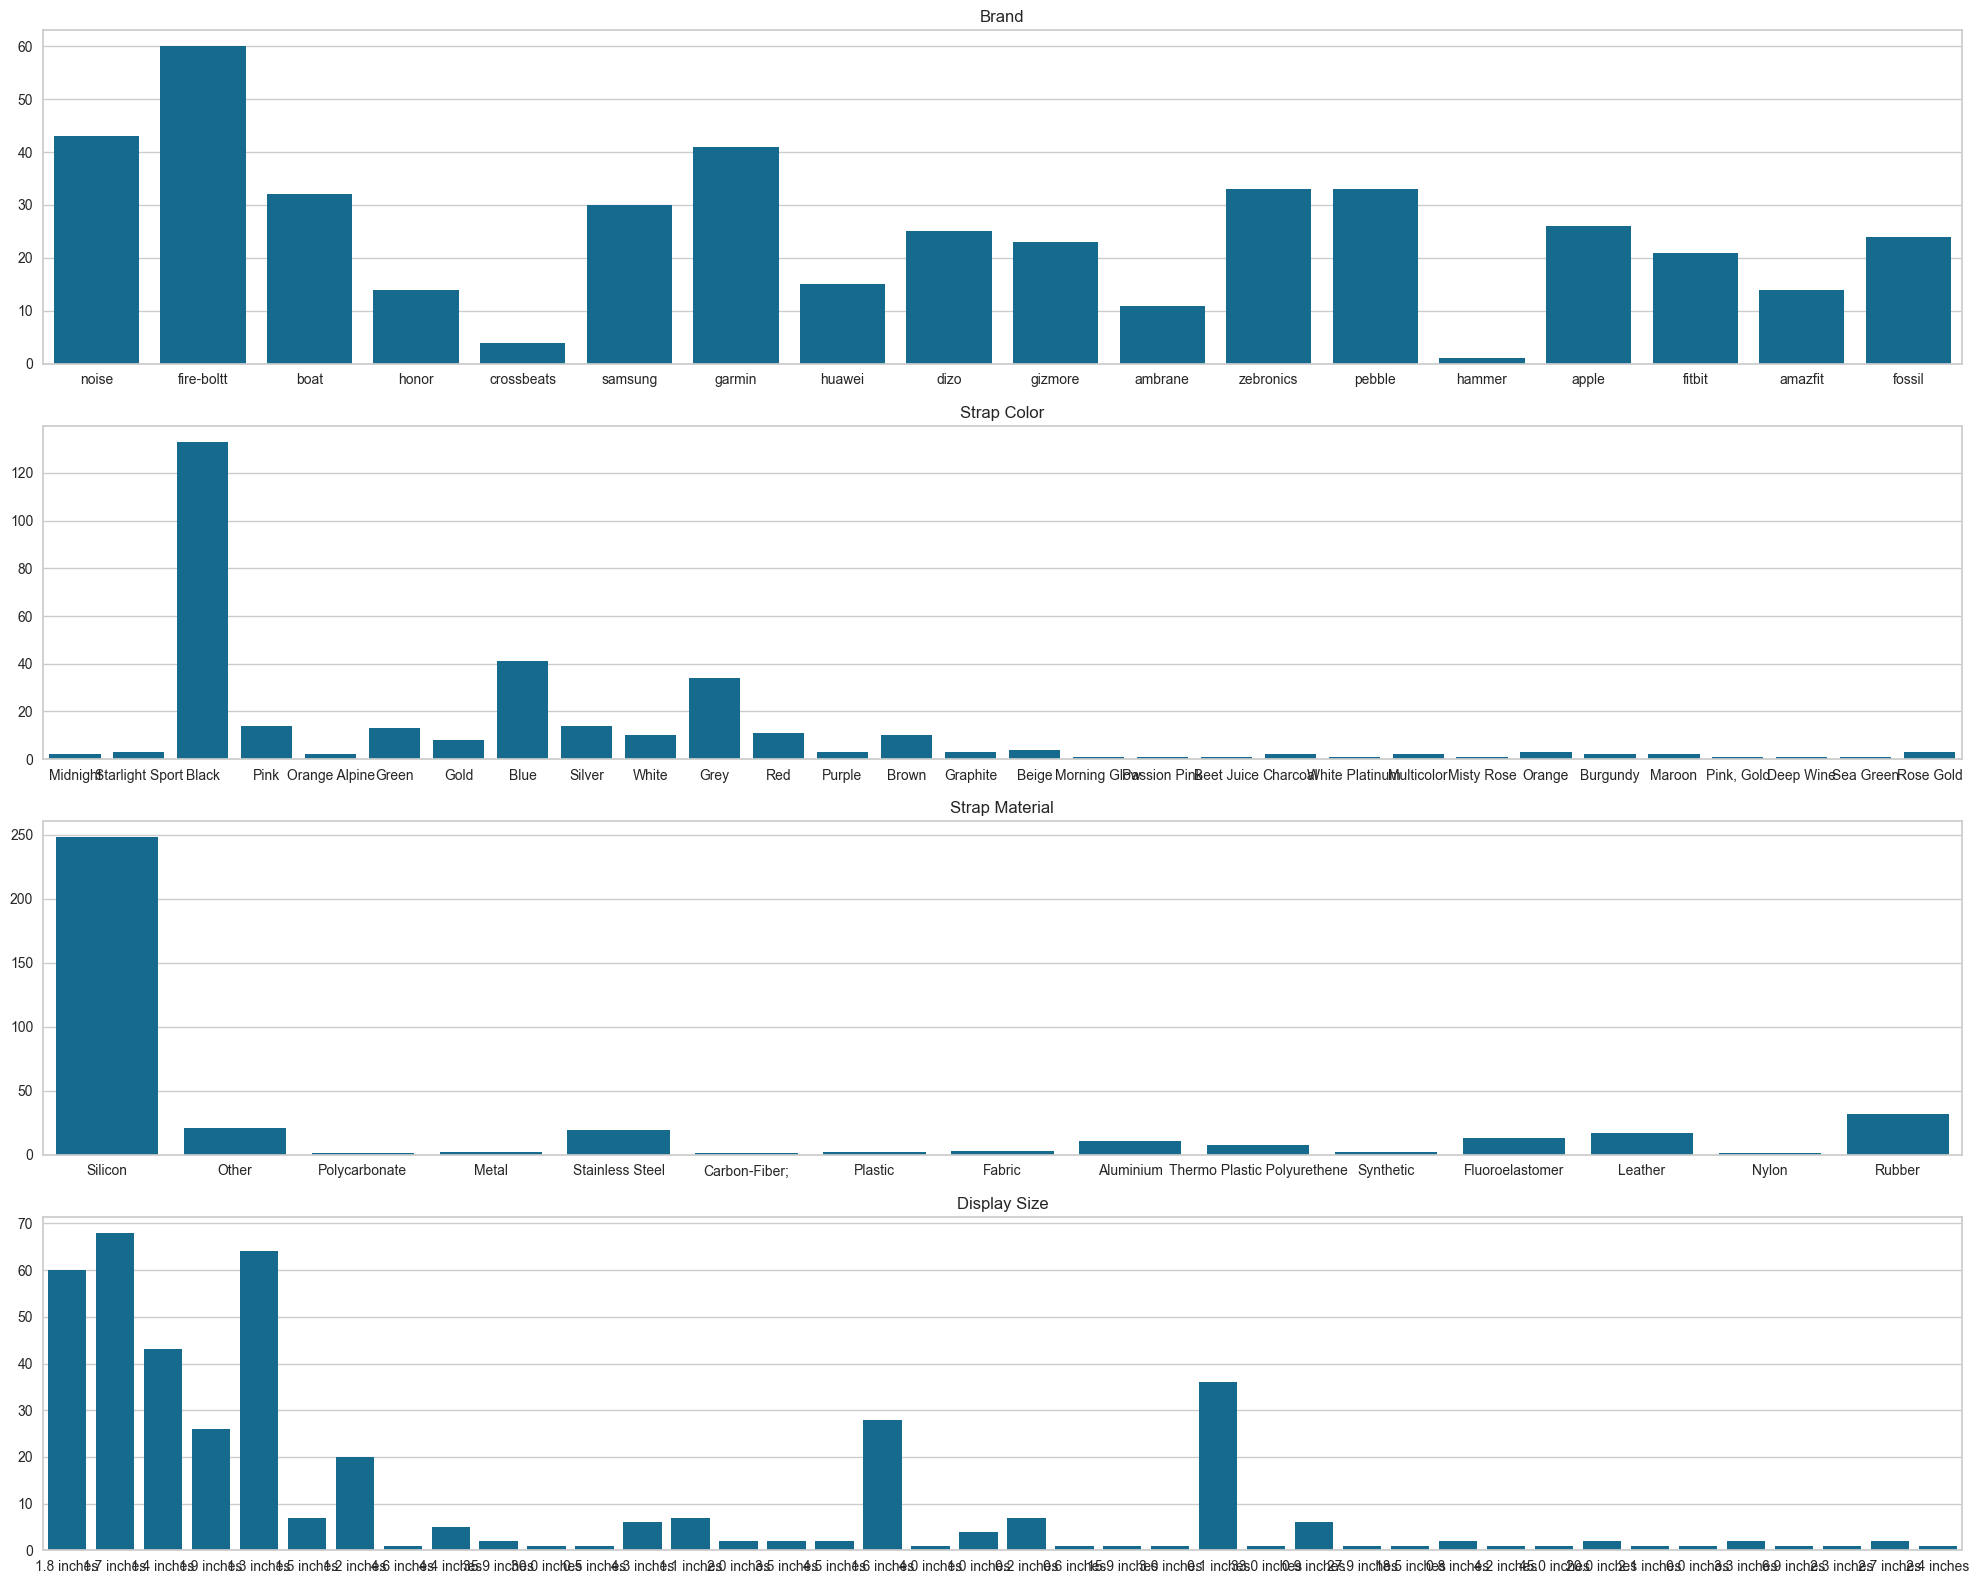

In [284]:
columns_num = ['Brand', 'Strap Color', 'Strap Material', 'Display Size']

fig, axes = plt.subplots(4, 1, figsize=(20, 16))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.countplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('', fontsize=15)
    axes[i].set_ylabel('')
    axes[i].FontSize = 5

plt.tight_layout()
plt.show()

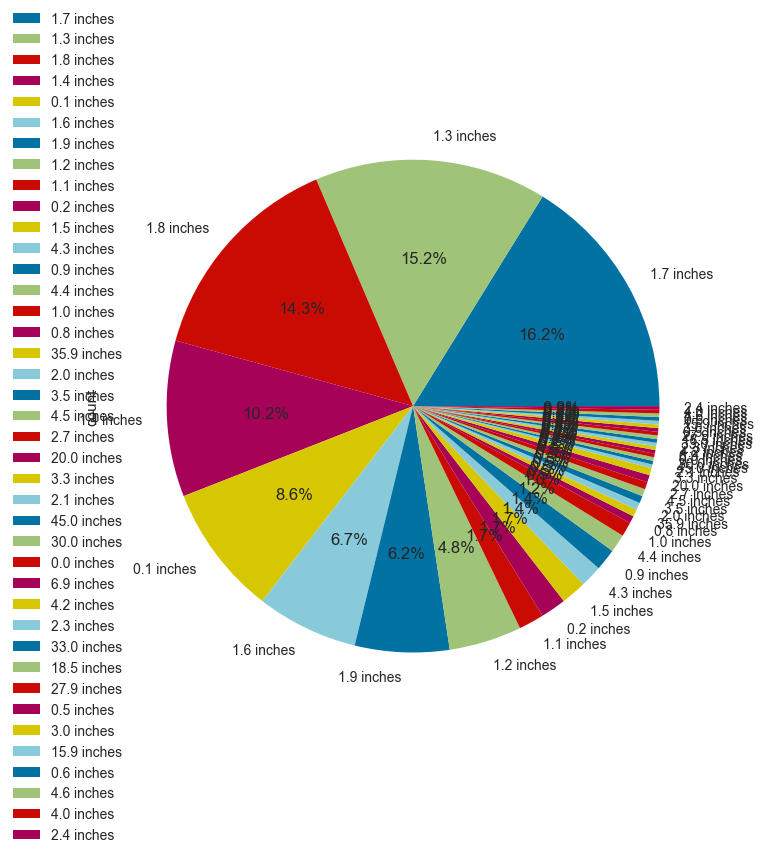

In [285]:

plt.figure(figsize=(8, 8))
pie = data["Display Size"].value_counts().plot(kind='pie',  autopct='%0.1f%%')
pie.figure.legend(loc="upper left")
plt.show()

## Transformacija podataka
----

Provera i uklanjenje duplikata:

In [286]:
print("Number Of Rows In The Original DataFrame:", len(data))

data = data.drop_duplicates()

print("Number Of Rows After Deduping:", len(data))

data1 = data1.drop_duplicates()

Number Of Rows In The Original DataFrame: 450
Number Of Rows After Deduping: 440


### Pronalazenje outliera

 Standard Deviation Method

In [287]:

columns = ['Current Price', 'Original Price',  'Number OF Ratings']

for column in columns:
    data_mean, data_std = mean(data[column]), std(data[column])
    cut_off = data_std * 2
    lower, upper = data_mean - cut_off, data_mean + cut_off

    outliers = [x for x in data[column] if x < lower or x > upper]
    data_no_outliers = data[(data[column] >= lower) & (data[column] <= upper)]

    print(f"{column} Identified outliers: {len(outliers)} ")



Current Price Identified outliers: 21 
Original Price Identified outliers: 18 
Number OF Ratings Identified outliers: 9 


Interquartile Range Method

In [288]:

for column in columns:
    q25, q75 = percentile(data[column], 25), percentile(data[column], 75)
    iqr = q75 - q25
  
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    outliers = [x for x in data[column] if x < lower or x > upper]

    print(f"{column} Identified outliers: {len(outliers)} ")

Current Price Identified outliers: 0 
Original Price Identified outliers: 0 
Number OF Ratings Identified outliers: 0 


Logaritam za ublazavanje outliera

In [289]:
for column in columns:
    data1[column] = [np.log(x) for x in data1[column]]

In [290]:
for column in columns:
    data_mean, data_std = mean(data1[column]), std(data1[column])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off

    outliers = [x for x in data1[column] if x < lower or x > upper]
    print(f"{column} Identified outliers: {len(outliers)} ")

Current Price Identified outliers: 0 
Original Price Identified outliers: 0 
Number OF Ratings Identified outliers: 0 


Brisanje outliera

In [291]:
data2 = data.copy()

data2 = data2[data2['Original Price'] < 60000]
data2 = data2[data2['Current Price'] < 40000]
data2 = data2[data2['Number OF Ratings'] < 100000]

data2.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
1  fire-boltt         3799.0         16999.0            77.651627     4.3   
2        boat         1999.0          7990.0            74.981227     3.8   
3  fire-boltt         1799.0         19999.0            91.004550     4.3   
4       noise         1599.0          4999.0            68.013603     4.1   
5       noise         1499.0          3999.0            62.515629     4.0   

   Number OF Ratings                              Model Name Dial Shape  \
1            20788.0                                  BSW046        NaN   
2            21724.0                               Wave Call        NaN   
3            13244.0                                  BSW053        NaN   
4            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   
5            32704.0                                  NSW-05        NaN   

  Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
1         NaN        Silicon         Yes                  3.5       Yes   
2         NaN        Silicon         Yes                  8.0       Yes   
3         NaN        Silicon         Yes                  3.5       Yes   
4         NaN          Other         Yes                  8.0       Yes   
5         NaN          Other         Yes                  8.0       Yes   

  Display Size     Weight  
1   1.8 inches  50 - 75 g  
2   1.7 inches  35 - 50 g  
3   1.8 inches      75g +  
4   1.7 inches  35 - 50 g  
5   1.7 inches  35 - 50 g

In [292]:
def printHistplot(columns, data):
    fig, axes = plt.subplots(1, 3, figsize=(20, 3))
    axes = axes.flatten()
    for i, column_name in enumerate(columns):
        sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
        axes[i].set_title(column_name)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        
    plt.tight_layout()
    plt.show()


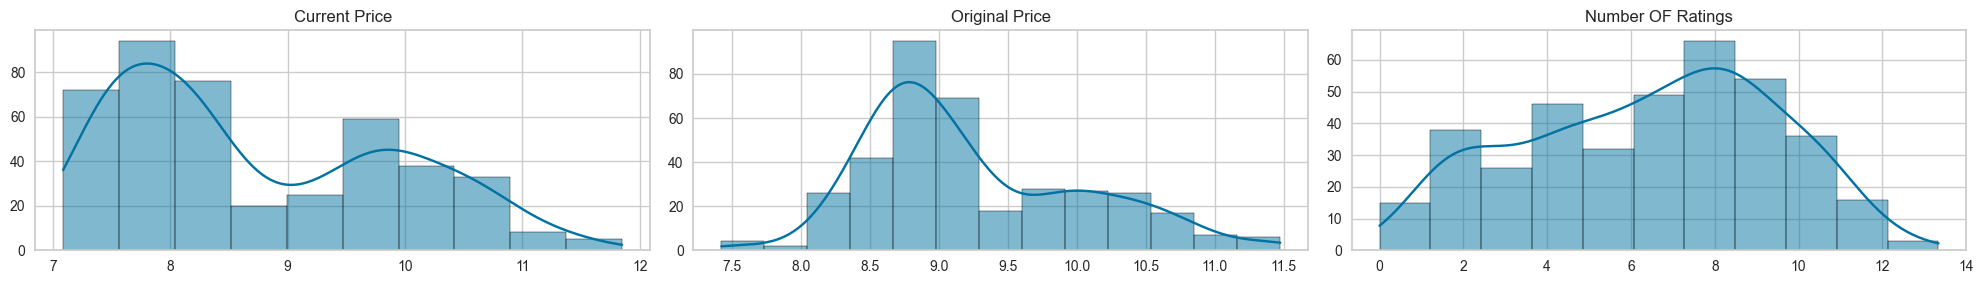

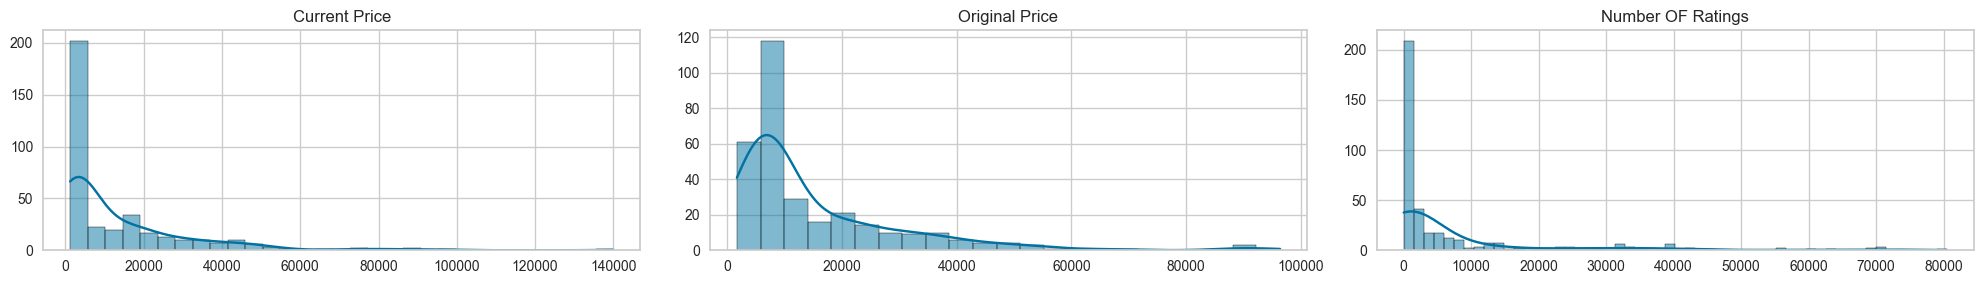

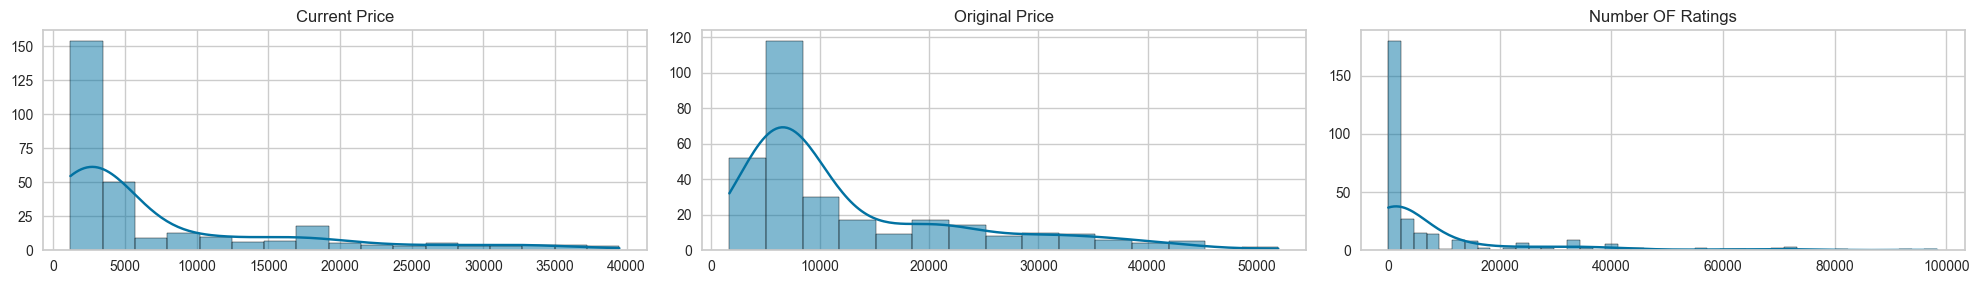

In [293]:
columns = ['Current Price', 'Original Price',  'Number OF Ratings']

printHistplot(columns, data1)
printHistplot(columns, data_no_outliers)
printHistplot(columns, data2)

Iz prethodnih grafika zakljucujemo da je najbolji izbor za resavanje outlier-a koriscenje logaritma


Sredjivanje negativnih vrednosti u koloni **Discount Percentage**

In [294]:
data1["Discount Percentage"] = [np.abs(x) for x in data["Discount Percentage"]]

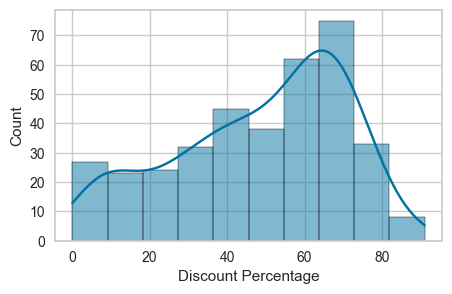

In [295]:
plt.figure(figsize=(5, 3))
sns.histplot(x="Discount Percentage", data=data1,  kde=True)
plt.show()

## Missing values

In [296]:
nan_count = data.isnull().sum().sort_values()

n_miss = {}
for column in data.columns:
    # count number of rows with missing values
    n_miss[column] = {}
    n_miss[column]["Count"] = data[column].isnull().sum()
    n_miss[column]["%"] = round(n_miss[column]["Count"] / data.shape[0] * 100, 2)

pd.DataFrame.from_dict(n_miss).T


Count      %
Brand                  0.0   0.00
Current Price         10.0   2.27
Original Price        73.0  16.59
Discount Percentage   73.0  16.59
Rating                 6.0   1.36
Number OF Ratings     59.0  13.41
Model Name            33.0   7.50
Dial Shape           113.0  25.68
Strap Color          113.0  25.68
Strap Material        66.0  15.00
Touchscreen           37.0   8.41
Battery Life (Days)   32.0   7.27
Bluetooth              6.0   1.36
Display Size          30.0   6.82
Weight               186.0  42.27

<Axes: >

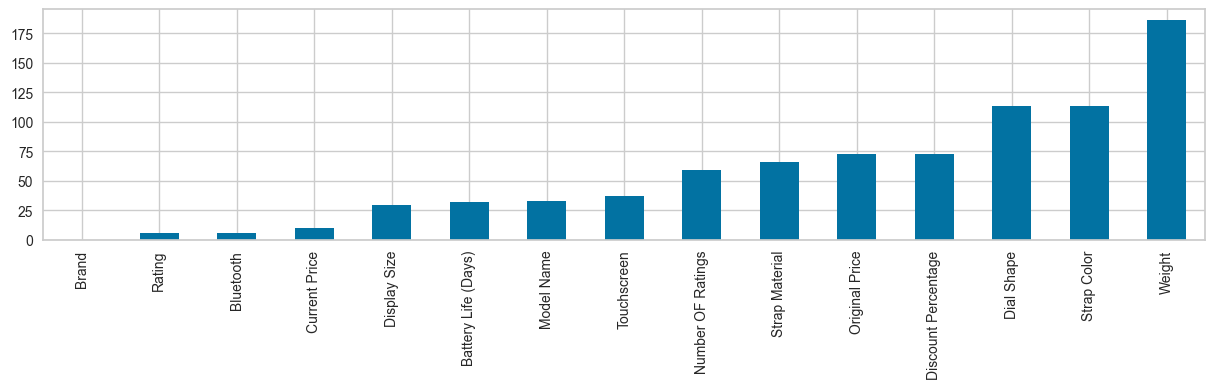

In [297]:
nan_count.plot(kind='bar', figsize=(15, 3))

In [298]:

scale_mapper = {
    '75g +': 1,
    '50 - 75 g': 2,
    '35 - 50 g': 3,
    '20 - 35 g': 4,
    '<= 20 g': 5 }

data1["Weight"] = data["Weight"].replace(scale_mapper)

scale_mapper = {
    'Yes': True,
    'No': False }

data1["Bluetooth"] = data["Bluetooth"].replace(scale_mapper)
data1["Touchscreen"] = data["Touchscreen"].replace(scale_mapper)


data1.head()




Brand  Current Price  Original Price  Discount Percentage  Rating  \
0       noise      11.326475       11.406453             7.686318     4.0   
1  fire-boltt       8.242493        9.740910            77.651627     4.3   
2        boat       7.600402        8.985946            74.981227     3.8   
3  fire-boltt       7.494986        9.903438            91.004550     4.3   
4       noise       7.377134        8.516993            68.013603     4.1   

   Number OF Ratings                              Model Name Dial Shape  \
0           4.174387   Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN   
1           9.942131                                  BSW046        NaN   
2           9.986173                               Wave Call        NaN   
3           9.491300                                  BSW053        NaN   
4           9.539716  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   

  Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0         NaN            NaN         NaN                  8.0      True   
1         NaN        Silicon        True                  3.5      True   
2         NaN        Silicon        True                  8.0      True   
3         NaN        Silicon        True                  3.5      True   
4         NaN          Other        True                  8.0      True   

  Display Size  Weight  
0          NaN     3.0  
1   1.8 inches     2.0  
2   1.7 inches     3.0  
3   1.8 inches     1.0  
4   1.7 inches     3.0

In [299]:
data1["Display Size"] = data["Display Size"].str.replace(" inches", "")

data1["Display Size"]  = data["Display Size"].str.replace(" inches", "").astype(float)
data1["Display Size"] = data1["Display Size"].astype(float)

data1["Display Size"]
data1["Display Size"].isnull().sum()

30

In [300]:

list = [1.7, 1.8, 1.9, 1.3, 1.4, 1.6, 1.5, 1.2 , 0.1]
uslov = ~data1["Display Size"].isin(list) & data1['Display Size'].notna()

data1["Display Size"] = np.where(uslov,1,data1["Display Size"])

print(len(data1["Display Size"]))
data1["Display Size"].isnull().sum()


440


30

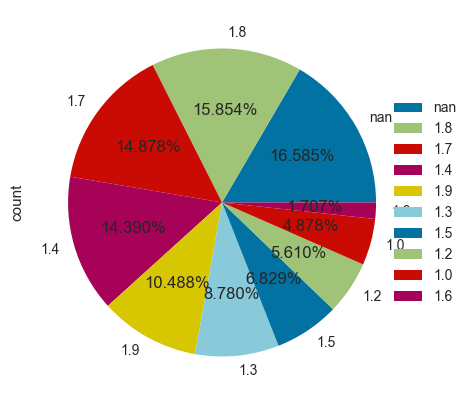

Display Size
1.0    68
1.7    65
1.3    61
1.8    59
1.4    43
0.1    36
1.6    28
1.9    23
1.2    20
1.5     7
Name: count, dtype: int64

In [301]:
plt.figure(figsize=(5, 5))
pie = data1["Display Size"].value_counts().plot(kind='pie', labels=data1["Display Size"].unique(), autopct='%0.3f%%')
pie.figure.legend(loc='right')
plt.show()

data1["Display Size"].unique()
data1["Display Size"].value_counts()

In [302]:
data1.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0       noise      11.326475       11.406453             7.686318     4.0   
1  fire-boltt       8.242493        9.740910            77.651627     4.3   
2        boat       7.600402        8.985946            74.981227     3.8   
3  fire-boltt       7.494986        9.903438            91.004550     4.3   
4       noise       7.377134        8.516993            68.013603     4.1   

   Number OF Ratings                              Model Name Dial Shape  \
0           4.174387   Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN   
1           9.942131                                  BSW046        NaN   
2           9.986173                               Wave Call        NaN   
3           9.491300                                  BSW053        NaN   
4           9.539716  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   

  Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0         NaN            NaN         NaN                  8.0      True   
1         NaN        Silicon        True                  3.5      True   
2         NaN        Silicon        True                  8.0      True   
3         NaN        Silicon        True                  3.5      True   
4         NaN          Other        True                  8.0      True   

   Display Size  Weight  
0           NaN     3.0  
1           1.8     2.0  
2           1.7     3.0  
3           1.8     1.0  
4           1.7     3.0

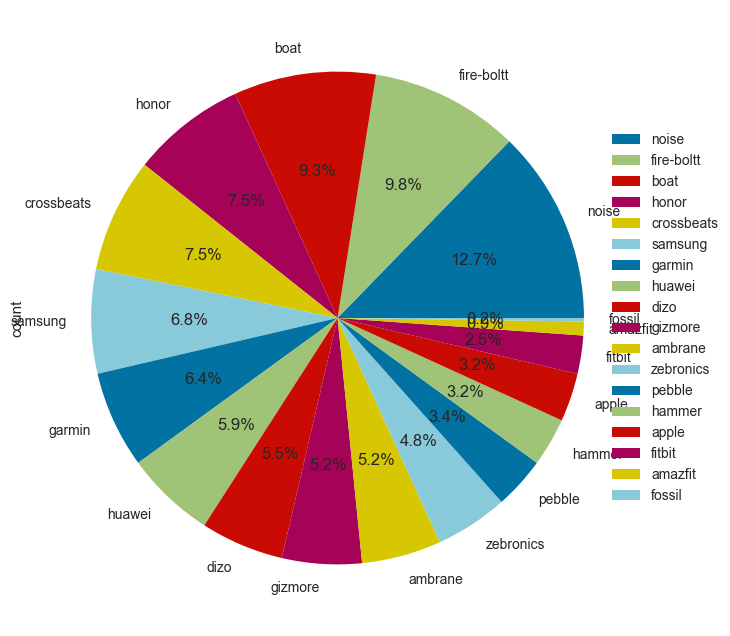

In [303]:
plt.figure(figsize=(8, 8))
pie = data["Brand"].value_counts().plot(kind='pie', labels=data["Brand"].unique(), autopct='%0.1f%%')
pie.figure.legend(loc='right')
plt.show()

Podela brendova u 3 vrste prema populatnosti:  
1) top **15% - 7.5%**
2) middle **6.8% - 5.2%**
3) low **4.8% - 0%** 

In [304]:
scale_mapper = {
    'noise': 'top',
    'fire-boltt': 'top',
    'boat': 'top',
    'honor': 'top',
    'crossbeats': 'top',
    'samsung': 'middle',
    'garmin': 'middle',
    'huawei': 'middle',
    'dizo': 'middle',
    'gizmore': 'middle',
    'ambrane': 'middle',
    'zebronics': 'low',
    'pebble': 'low',
    'hammer': 'low',
    'apple': 'low',
    'fitbit': 'low',
    'amazfit': 'low',
    'fossil': 'low'
    }
data1["Brand"] = data["Brand"].replace(scale_mapper)


In [305]:
data1.rename(columns={'Brand': 'b'}, inplace=True)

In [306]:
print(data["Strap Material"].value_counts())

scale_mapper = {
    'Silicon': 'Silicon',
    'Other': 'Other',
    'Rubber': 'Rubber',
    'Fluoroelastomer': 'Rubber',
    'Leather': 'Leather',
    'Metal': 'Metal',  
    'Stainless Steel': 'Metal',
    'Aluminium': 'Metal',
    'Polycarbonate': 'Other',
    'Carbon-Fiber;': 'Other',
    'Plastic': 'Other',
    'Fabric': 'Other',
    'Thermo Plastic Polyurethene': 'Other',
    'Synthetic': 'Other',
    'Nylon': 'Other'
    }
data1["Strap Material"] = data["Strap Material"].replace(scale_mapper)
print("-----------------")
print(data1["Strap Material"].value_counts())


Strap Material
Silicon                        241
Rubber                          32
Other                           21
Stainless Steel                 19
Leather                         17
Fluoroelastomer                 13
Aluminium                       11
Thermo Plastic Polyurethene      8
Fabric                           3
Metal                            2
Plastic                          2
Synthetic                        2
Polycarbonate                    1
Carbon-Fiber;                    1
Nylon                            1
Name: count, dtype: int64
-----------------
Strap Material
Silicon    241
Rubber      45
Other       39
Metal       32
Leather     17
Name: count, dtype: int64


In [307]:
scale_mapper = {
    'Circle': 'Circle',
    'Square': 'Rectangle',
    'Rectangle': 'Rectangle',
    'Curved': 'Circle',
    'Contemporary': 'Circle',
    'Oval': 'Circle',
    }
data1["Dial Shape"] = data["Dial Shape"].replace(scale_mapper)
print(data1["Dial Shape"].value_counts())

Dial Shape
Rectangle    188
Circle       139
Name: count, dtype: int64


In [308]:
print(data['Strap Color'].value_counts())
color_mapping = {
    'Midnight': 'Black',
    'Starlight Sport': 'White',
    'Black': 'Black',
    'Pink': 'Pink',
    'Orange Alpine': 'Orange',
    'Green': 'Green',
    'Gold': 'Gold',
    'Blue': 'Blue',
    'Silver': 'Grey',
    'White': 'White',
    'Grey': 'Grey',
    'Red': 'Red',
    'Purple': 'Purple',
    'Brown': 'Brown',
    'Graphite': 'Grey',
    'Beige': 'Brown',
    'Morning Glow': 'Orange',
    'Passion Pink': 'Pink',
    'Beet Juice': 'Purple',
    'Charcoal': 'Grey',
    'White Platinum': 'White',
    'Multicolor': 'Multicolor',
    'Misty Rose': 'Pink',
    'Orange': 'Orange',
    'Burgundy': 'Red',
    'Maroon': 'Red',
    'Pink, Gold': 'Pink',
    'Deep Wine': 'Red',
    'Sea Green': 'Green',
    'Rose Gold': 'Gold'
}
data1["Strap Color"] = data["Strap Color"].replace(color_mapping)
data1['Strap Color'].value_counts()



Strap Color
Black              133
Blue                41
Grey                34
Pink                14
Silver              14
Green               13
Red                 11
White               10
Brown               10
Gold                 8
Beige                4
Graphite             3
Orange               3
Starlight Sport      3
Rose Gold            3
Purple               3
Charcoal             2
Multicolor           2
Orange Alpine        2
Burgundy             2
Maroon               2
Midnight             2
Morning Glow         1
Passion Pink         1
Beet Juice           1
White Platinum       1
Misty Rose           1
Pink, Gold           1
Deep Wine            1
Sea Green            1
Name: count, dtype: int64


Strap Color
Black         135
Grey           53
Blue           41
Pink           17
Red            16
White          14
Green          14
Brown          14
Gold           11
Orange          6
Purple          4
Multicolor      2
Name: count, dtype: int64

In [309]:

data1 = pd.get_dummies(data=data1, columns=['Dial Shape', 'b', "Strap Color", "Strap Material"],drop_first=True )
data1

Current Price  Original Price  Discount Percentage  Rating  \
0        11.326475       11.406453             7.686318     4.0   
1         8.242493        9.740910            77.651627     4.3   
2         7.600402        8.985946            74.981227     3.8   
3         7.494986        9.903438            91.004550     4.3   
4         7.377134        8.516993            68.013603     4.1   
..             ...             ...                  ...     ...   
445       8.699348        9.104869            33.337037     2.5   
446       8.216088        9.210240            62.996300     NaN   
447       8.699348        9.104869            33.337037     2.5   
448       8.070906        8.987072            59.994999     NaN   
449       8.006368        8.987072            62.495312     NaN   

     Number OF Ratings                              Model Name Touchscreen  \
0             4.174387   Wrb-sw-colorfitpro4alpha-std-rgld_pnk         NaN   
1             9.942131                                  BSW046        True   
2             9.986173                               Wave Call        True   
3             9.491300                                  BSW053        True   
4             9.539716  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        True   
..                 ...                                     ...         ...   
445                NaN                                  bsw003        True   
446                NaN                               beast pro        True   
447                NaN                                  bsw003        True   
448                NaN                                  call 2        True   
449                NaN                                  call 2        True   

     Battery Life (Days) Bluetooth  Display Size  ...  Strap Color_Multicolor  \
0                    8.0      True           NaN  ...                   False   
1                    3.5      True           1.8  ...                   False   
2                    8.0      True           1.7  ...                   False   
3                    3.5      True           1.8  ...                   False   
4                    8.0      True           1.7  ...                   False   
..                   ...       ...           ...  ...                     ...   
445                 22.0      True           1.3  ...                   False   
446                  8.0      True           0.1  ...                   False   
447                 22.0      True           1.3  ...                   False   
448                 22.0      True           0.1  ...                   False   
449                 22.0      True           0.1  ...                   False   

     Strap Color_Orange  Strap Color_Pink  Strap Color_Purple  \
0                 False             False               False   
1                 False             False               False   
2                 False             False               False   
3                 False             False               False   
4                 False             False               False   
..                  ...               ...                 ...   
445               False             False               False   
446               False             False               False   
447               False             False               False   
448               False             False               False   
449               False             False               False   

     Strap Color_Red  Strap Color_White  Strap Material_Metal  \
0              False              False                 False   
1              False              False                 False   
2              False              False                 False   
3              False              False                 False   
4              False              False                 False   
..               ...                ...                   ...   
445            False              False               

In [310]:
#data1 = data1.drop(columns=['Weight', "Strap Color", "Dial Shape", "Model Name", "Strap Material" ])
data1 = data1.drop(columns=['Weight',  "Model Name" ])

data1

Current Price  Original Price  Discount Percentage  Rating  \
0        11.326475       11.406453             7.686318     4.0   
1         8.242493        9.740910            77.651627     4.3   
2         7.600402        8.985946            74.981227     3.8   
3         7.494986        9.903438            91.004550     4.3   
4         7.377134        8.516993            68.013603     4.1   
..             ...             ...                  ...     ...   
445       8.699348        9.104869            33.337037     2.5   
446       8.216088        9.210240            62.996300     NaN   
447       8.699348        9.104869            33.337037     2.5   
448       8.070906        8.987072            59.994999     NaN   
449       8.006368        8.987072            62.495312     NaN   

     Number OF Ratings Touchscreen  Battery Life (Days) Bluetooth  \
0             4.174387         NaN                  8.0      True   
1             9.942131        True                  3.5      True   
2             9.986173        True                  8.0      True   
3             9.491300        True                  3.5      True   
4             9.539716        True                  8.0      True   
..                 ...         ...                  ...       ...   
445                NaN        True                 22.0      True   
446                NaN        True                  8.0      True   
447                NaN        True                 22.0      True   
448                NaN        True                 22.0      True   
449                NaN        True                 22.0      True   

     Display Size  Dial Shape_Rectangle  ...  Strap Color_Multicolor  \
0             NaN                 False  ...                   False   
1             1.8                 False  ...                   False   
2             1.7                 False  ...                   False   
3             1.8                 False  ...                   False   
4             1.7                 False  ...                   False   
..            ...                   ...  ...                     ...   
445           1.3                 False  ...                   False   
446           0.1                  True  ...                   False   
447           1.3                 False  ...                   False   
448           0.1                  True  ...                   False   
449           0.1                  True  ...                   False   

     Strap Color_Orange  Strap Color_Pink  Strap Color_Purple  \
0                 False             False               False   
1                 False             False               False   
2                 False             False               False   
3                 False             False               False   
4                 False             False               False   
..                  ...               ...                 ...   
445               False             False               False   
446               False             False               False   
447               False             False               False   
448               False             False               False   
449               False             False               False   

     Strap Color_Red  Strap Color_White  Strap Material_Metal  \
0              False              False                 False   
1              False              False                 False   
2              False              False                 False   
3              False              False                 False   
4              False              False                 False   
..               ...                ...                   ...   
445            False              False                 False   
446            False              False                 False   
447            False              False                 False   
448            False              False                 False   
449       

### Filling missing values


Strategije popunjavanja:
- mean
- median
- mode
- constant

In [311]:
data1.fillna(data1.mean(),inplace=True)
data1.isna().sum()


Current Price             0
Original Price            0
Discount Percentage       0
Rating                    0
Number OF Ratings         0
Touchscreen               0
Battery Life (Days)       0
Bluetooth                 0
Display Size              0
Dial Shape_Rectangle      0
b_middle                  0
b_top                     0
Strap Color_Blue          0
Strap Color_Brown         0
Strap Color_Gold          0
Strap Color_Green         0
Strap Color_Grey          0
Strap Color_Multicolor    0
Strap Color_Orange        0
Strap Color_Pink          0
Strap Color_Purple        0
Strap Color_Red           0
Strap Color_White         0
Strap Material_Metal      0
Strap Material_Other      0
Strap Material_Rubber     0
Strap Material_Silicon    0
dtype: int64

In [312]:
data.isna().sum()

Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              33
Dial Shape             113
Strap Color            113
Strap Material          66
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [313]:
data1

Current Price  Original Price  Discount Percentage    Rating  \
0        11.326475       11.406453             7.686318  4.000000   
1         8.242493        9.740910            77.651627  4.300000   
2         7.600402        8.985946            74.981227  3.800000   
3         7.494986        9.903438            91.004550  4.300000   
4         7.377134        8.516993            68.013603  4.100000   
..             ...             ...                  ...       ...   
445       8.699348        9.104869            33.337037  2.500000   
446       8.216088        9.210240            62.996300  4.032949   
447       8.699348        9.104869            33.337037  2.500000   
448       8.070906        8.987072            59.994999  4.032949   
449       8.006368        8.987072            62.495312  4.032949   

     Number OF Ratings Touchscreen  Battery Life (Days) Bluetooth  \
0             4.174387    0.940447                  8.0      True   
1             9.942131        True                  3.5      True   
2             9.986173        True                  8.0      True   
3             9.491300        True                  3.5      True   
4             9.539716        True                  8.0      True   
..                 ...         ...                  ...       ...   
445           6.445428        True                 22.0      True   
446           6.445428        True                  8.0      True   
447           6.445428        True                 22.0      True   
448           6.445428        True                 22.0      True   
449           6.445428        True                 22.0      True   

     Display Size  Dial Shape_Rectangle  ...  Strap Color_Multicolor  \
0        1.343415                 False  ...                   False   
1        1.800000                 False  ...                   False   
2        1.700000                 False  ...                   False   
3        1.800000                 False  ...                   False   
4        1.700000                 False  ...                   False   
..            ...                   ...  ...                     ...   
445      1.300000                 False  ...                   False   
446      0.100000                  True  ...                   False   
447      1.300000                 False  ...                   False   
448      0.100000                  True  ...                   False   
449      0.100000                  True  ...                   False   

     Strap Color_Orange  Strap Color_Pink  Strap Color_Purple  \
0                 False             False               False   
1                 False             False               False   
2                 False             False               False   
3                 False             False               False   
4                 False             False               False   
..                  ...               ...                 ...   
445               False             False               False   
446               False             False               False   
447               False             False               False   
448               False             False               False   
449               False             False               False   

     Strap Color_Red  Strap Color_White  Strap Material_Metal  \
0              False              False                 False   
1              False              False                 False   
2              False              False                 False   
3              False              False                 False   
4              False              False                 False   
..               ...                ...                   ...   
445            False              False                 False   
446            False              False                 False   
447            False              False                 False   
448            False              False            

## Data corelation

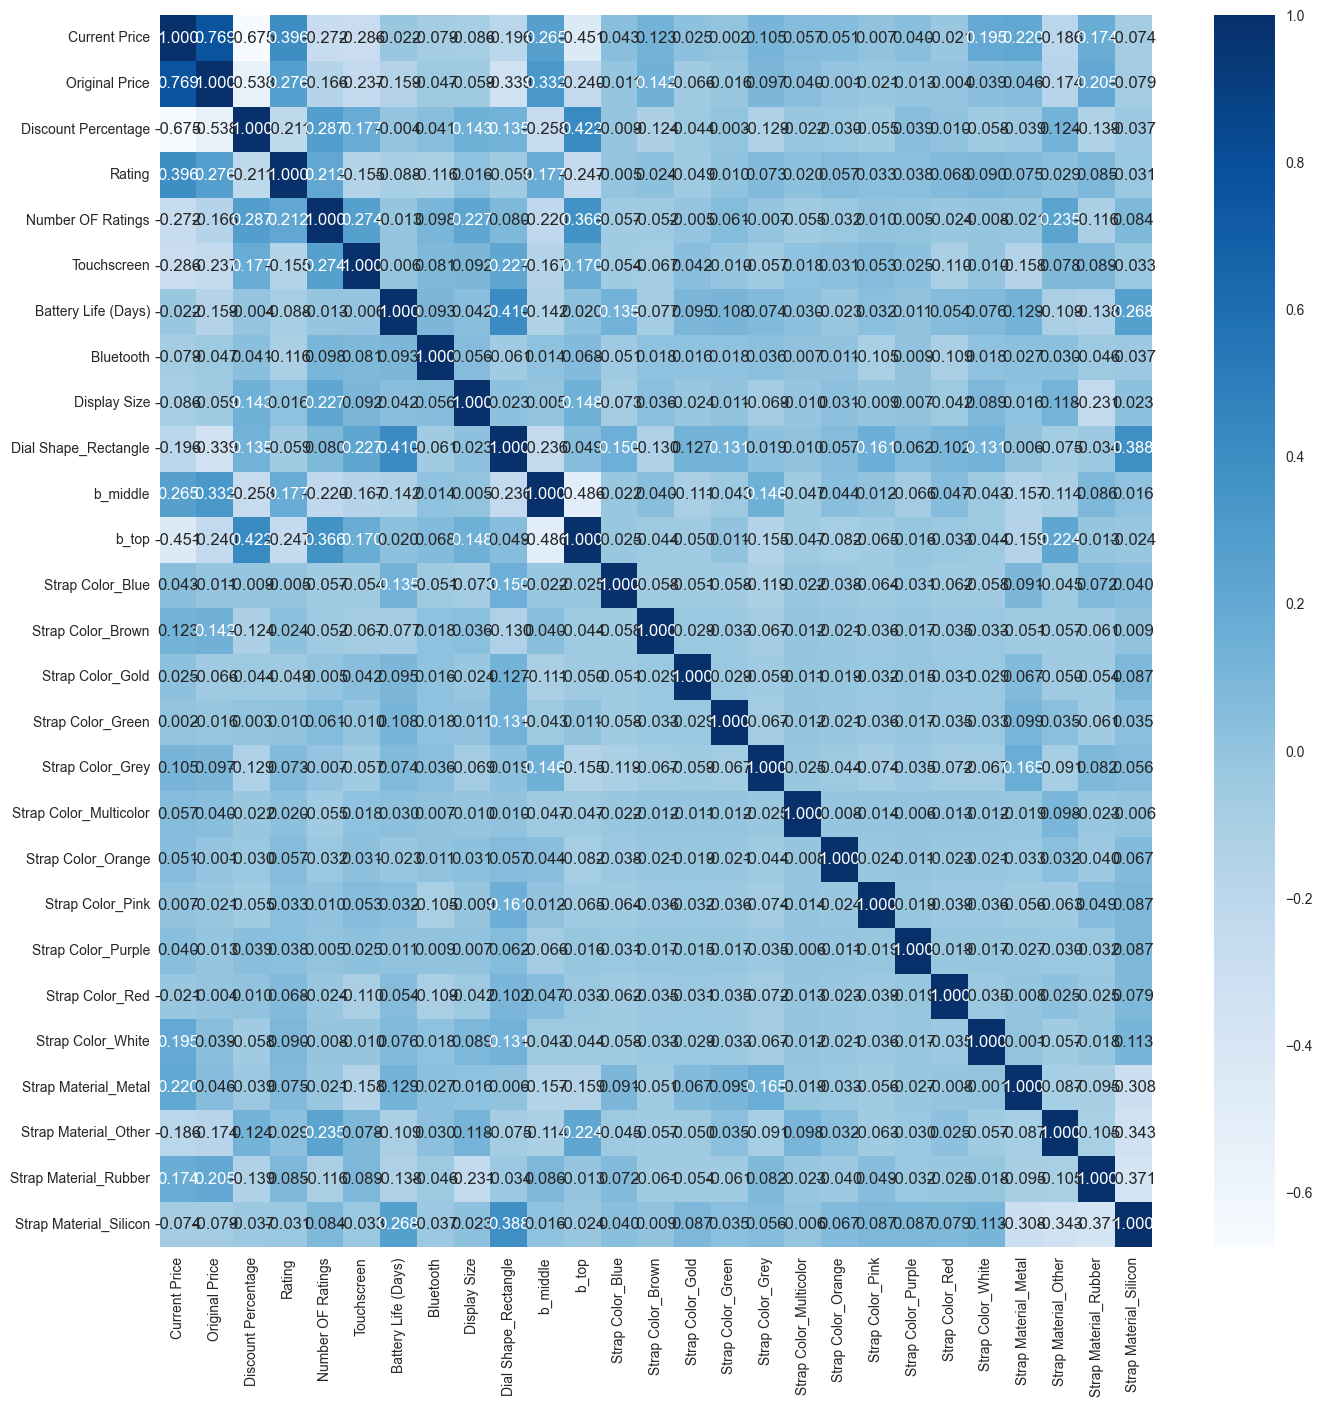

In [314]:
df_corr = data1.corr()
plt.figure(figsize = (16,16))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
plt.show()

## Standardize data

In [315]:

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(data1)


## Primena algoritama


helper funkcije

The Silhouette score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.

Calinski and Harabasz score is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion.

Davies-Bouldin score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. The minimum score is zero, with lower values indicating better clustering.

In [316]:
def printResult(y_value, X_value, claster_center):

    print("calinski_harabasz_score", calinski_harabasz_score(X_value, y_value))
    print("Silhouette score: ", silhouette_score(X_value, y_value))
    print("Davies-Bouldin score: ", davies_bouldin_score(X_value, y_value))

    unique_labels = np.unique(y_value)
    for label in zip(unique_labels):
        plt.scatter(X_value[y_value == label][:, 0], X_value[y_value == label][:, 1], s=25, label=f'Cluster {label}')

    if(claster_center is not None):
        plt.scatter(claster_center[:, 0], claster_center[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def printCenters(claster_center):
    plt.figure(figsize=(20, 15))

    for i in range(len(claster_center)):
        plt.subplot(len(claster_center), 1, i + 1)
        plt.bar(range(features_std.shape[1]), claster_center[i], tick_label=[f'{j[0:8]}' for j in data1.columns])
        plt.title(f'Cluster {i + 1} - Feature Importance')

    plt.tight_layout()
    plt.show()


def print3D(Y, X):
    pca = PCA(n_components=3)
    PCA_components = pca.fit_transform(X)
    principalComponents = pd.DataFrame(PCA_components, columns=(["f1","f2", "f3"]))
    principalComponents.head()

    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.scatter3D(principalComponents["f1"], principalComponents["f2"], principalComponents["f3"], c=Y, cmap='viridis')
    ax.set_title("3D scatterplot of size-reduced data")

    plt.show()

### dendrogram

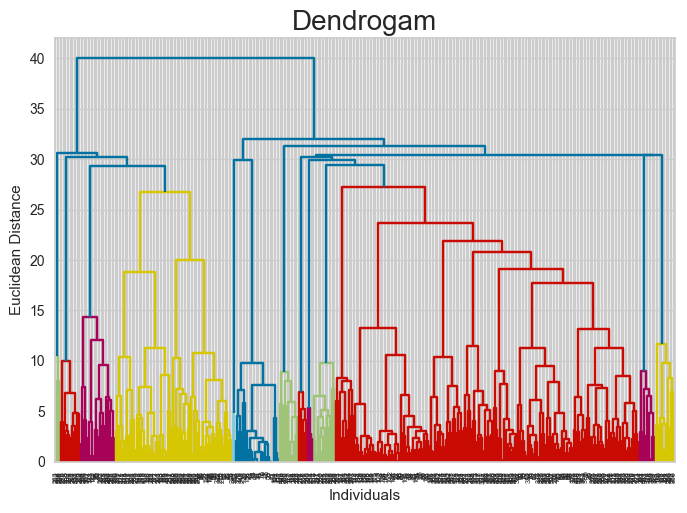

In [317]:
dendrogram = sch.dendrogram(sch.linkage(features_std, method = 'ward'))
# ovo da se poveca slika
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Individuals')
plt.ylabel('Euclidean Distance')
plt.show()

### KMeans

#### Elbow Method

Elbow Method to determine the number of clusters to be formed:


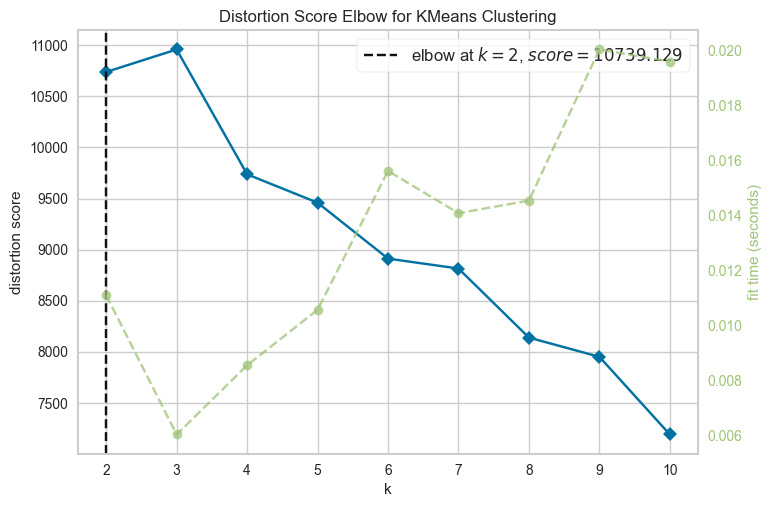

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [318]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(features_std)
Elbow_M.show()


trazi najbolji broj za klastere 
mnogo loseee

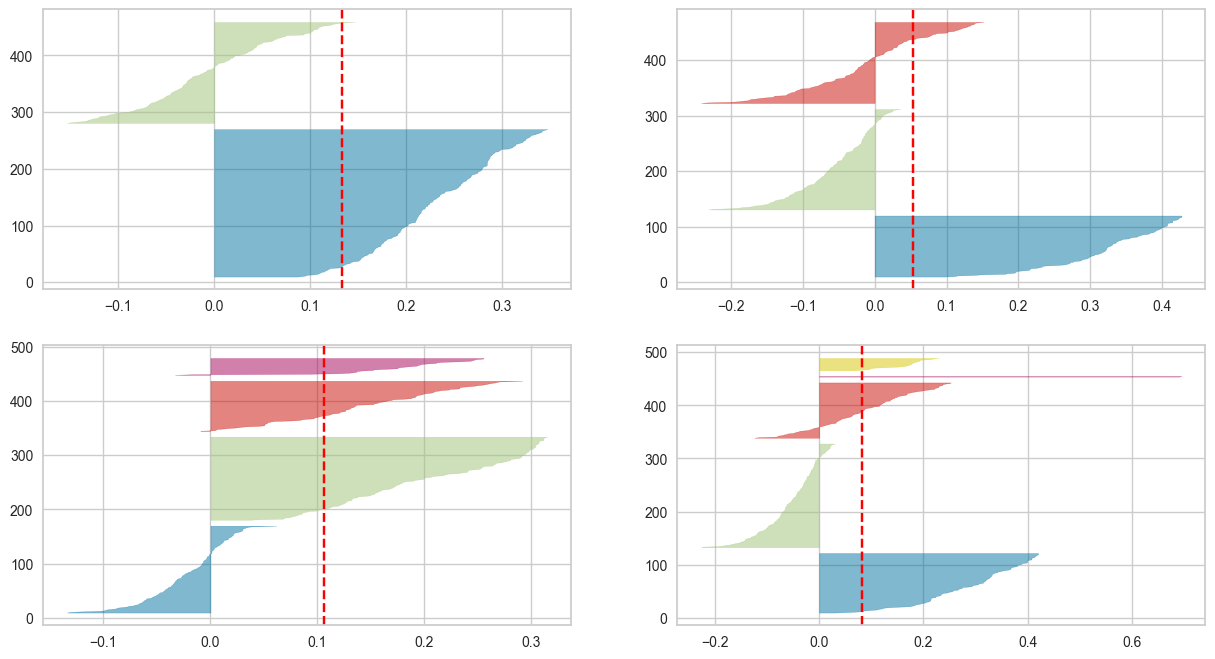

In [319]:
# ovo sa prepisala treba izmeniti ili izbaciti

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2) # ovo je reatrdirano
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(features_std)

calinski_harabasz_score 33.16206753927689
Silhouette score:  0.10189627690130233
Davies-Bouldin score:  2.5148068726822106


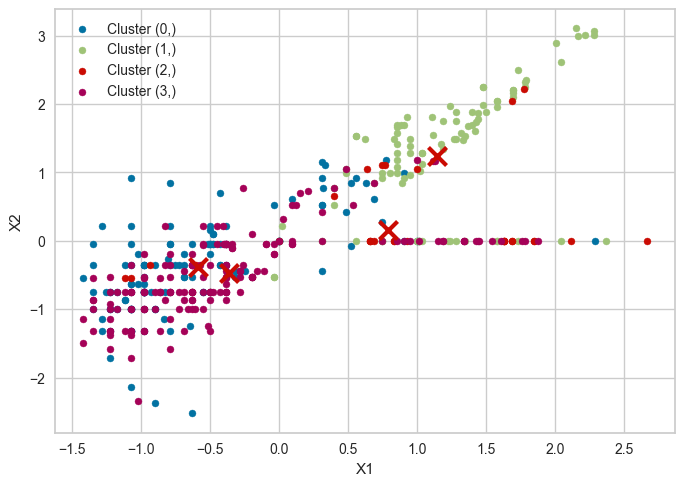

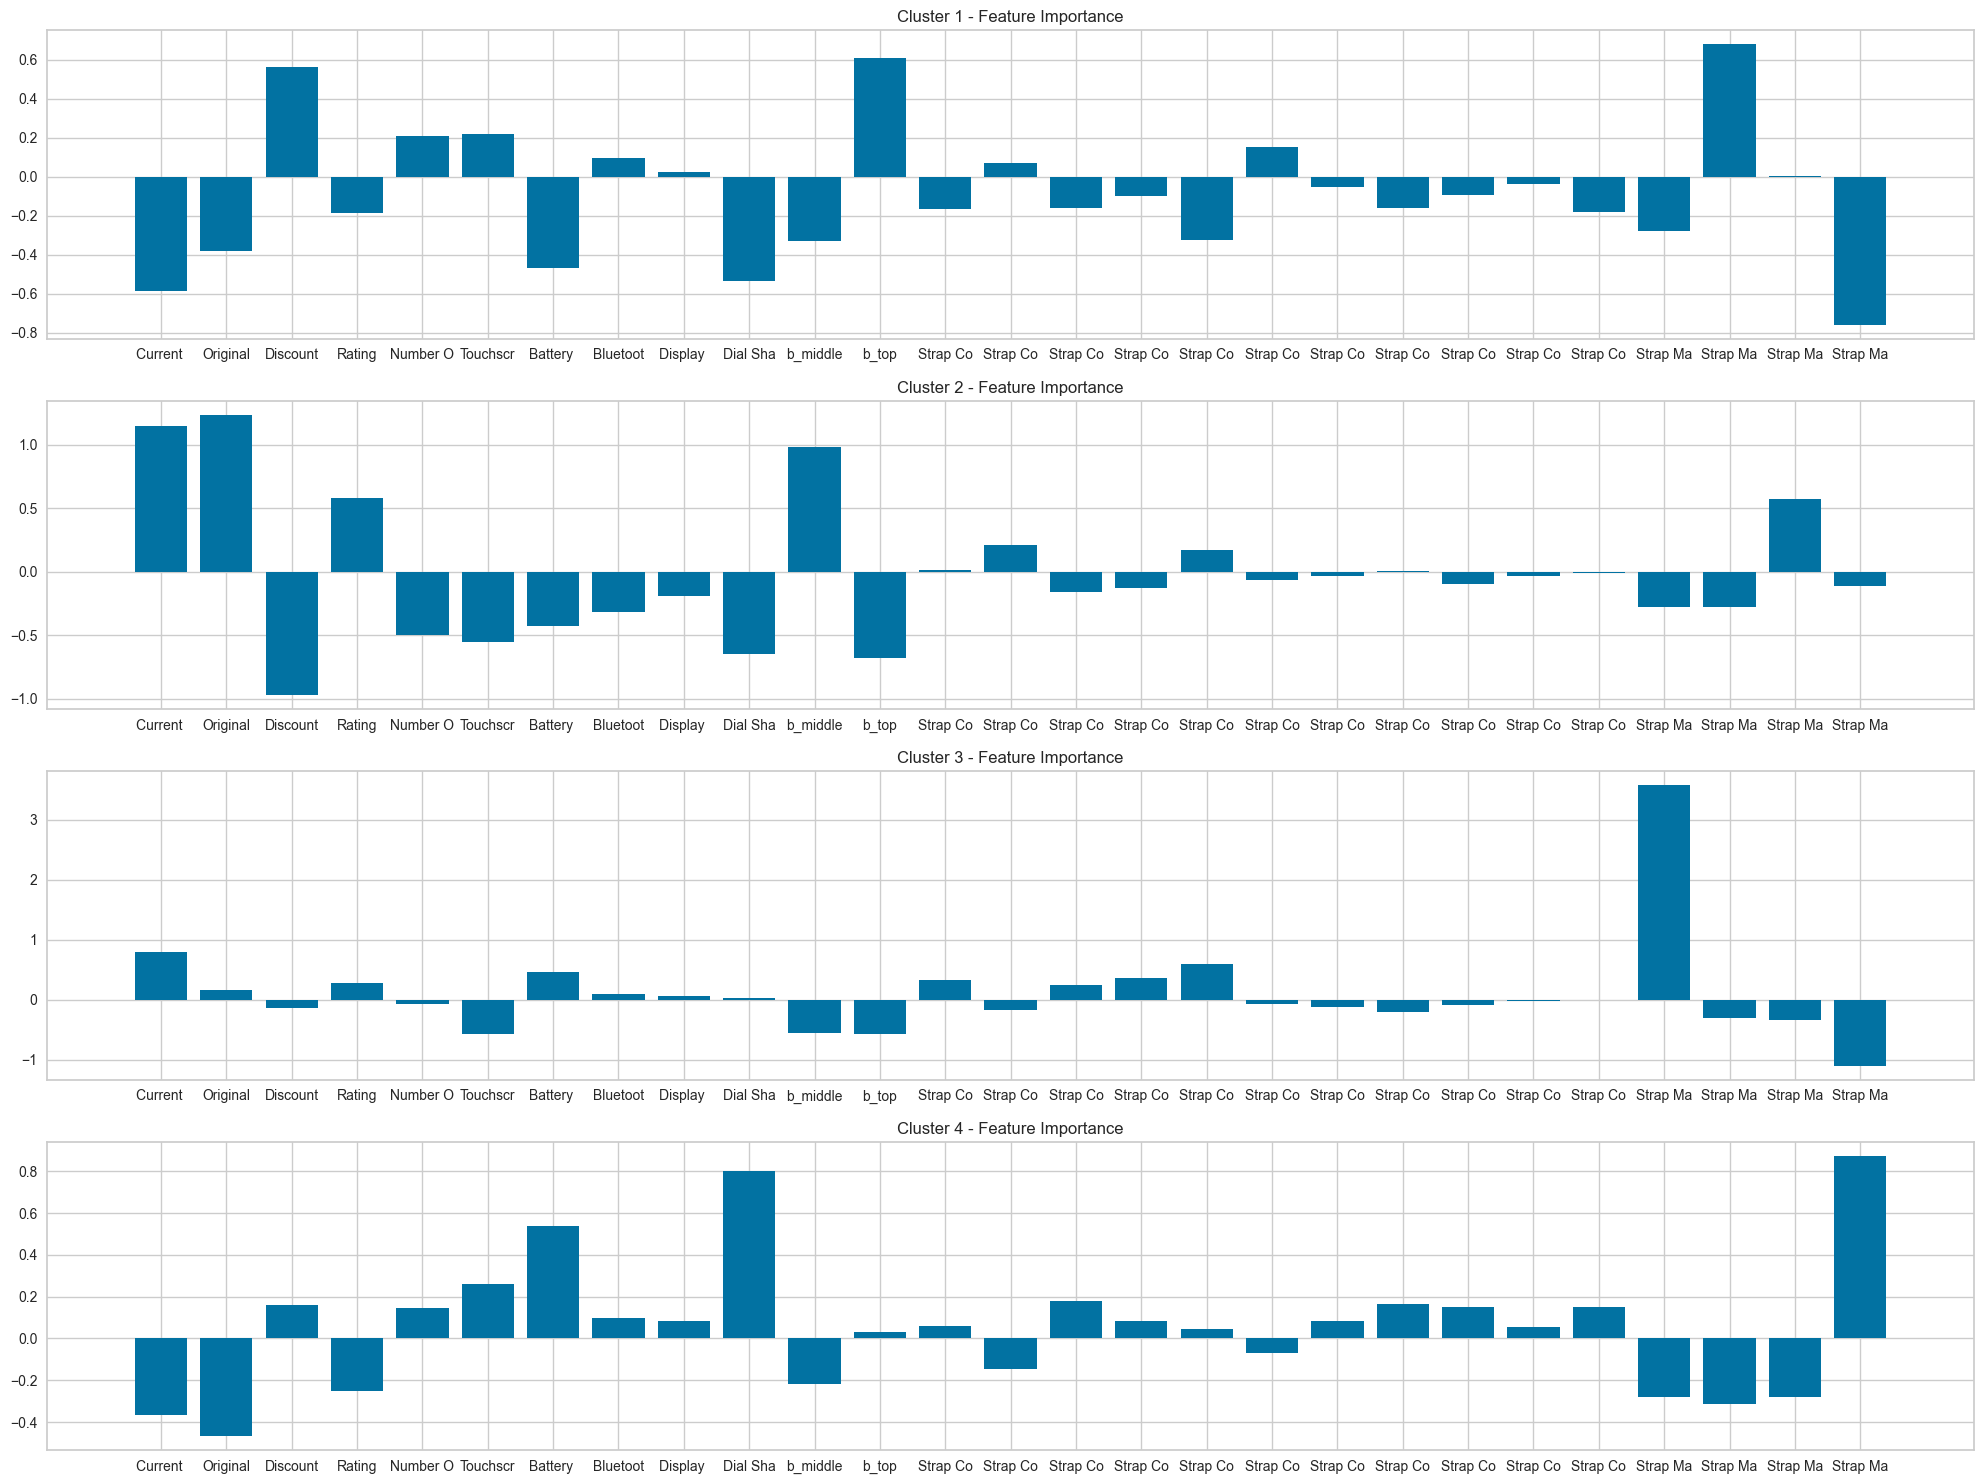

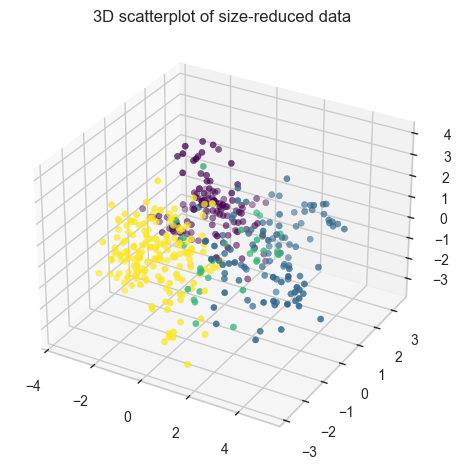

In [320]:

kmeans = KMeans(n_clusters=4, n_init=50, init='k-means++', max_iter=500).fit(features_std)

pred_kmeans = kmeans.predict(features_std)

claster_center_kmeans = kmeans.cluster_centers_

printResult(pred_kmeans, features_std, claster_center_kmeans)
printCenters(claster_center_kmeans)
print3D(pred_kmeans, features_std)



### MeanShift


calinski_harabasz_score 15.659884741806286
Silhouette score:  0.27789975664925054
Davies-Bouldin score:  0.6905561320749929


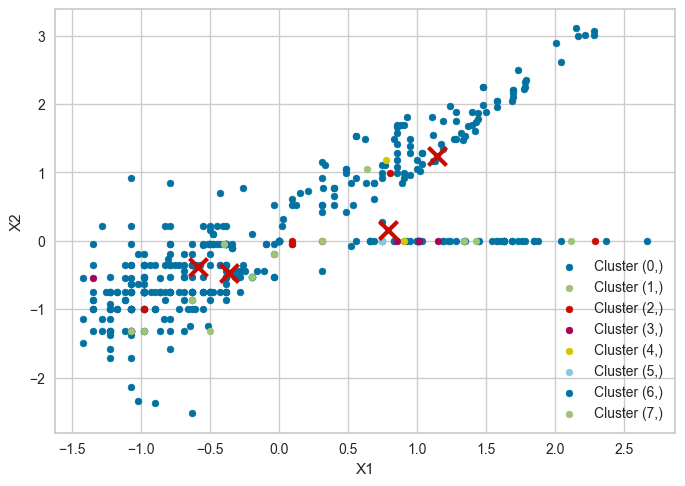

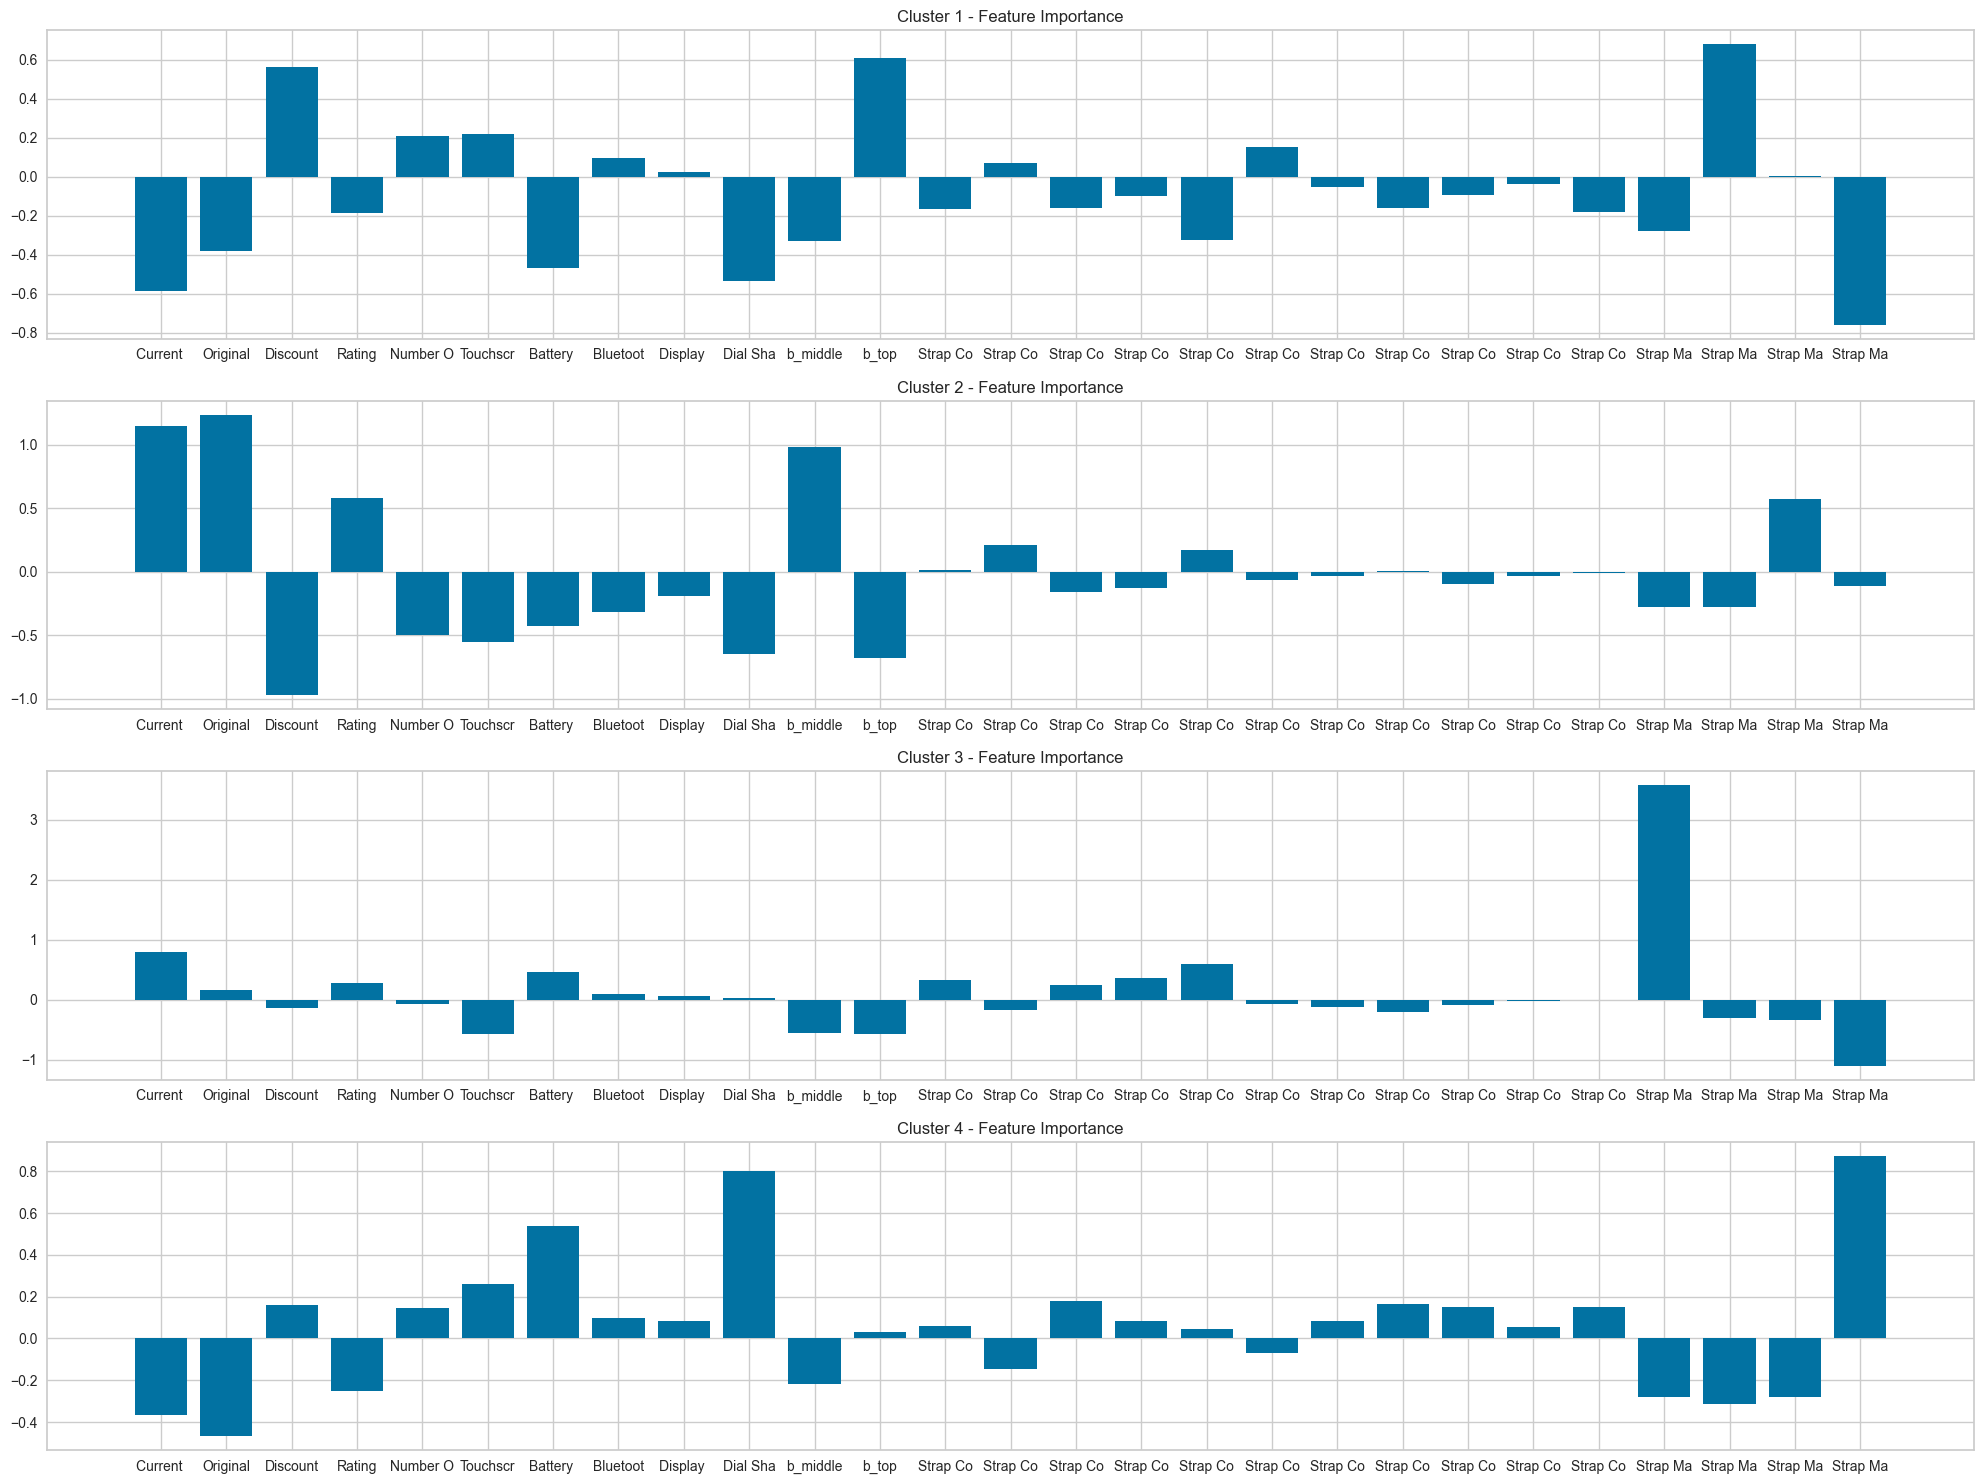

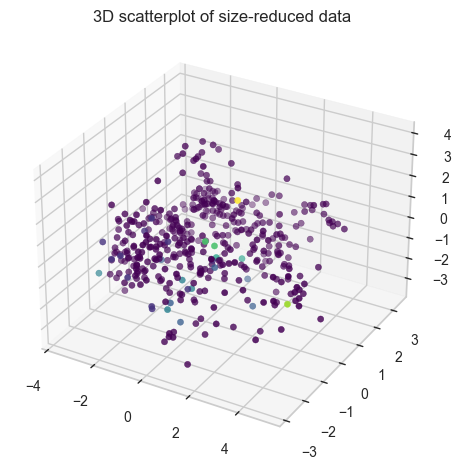

In [321]:

mean_shift = MeanShift().fit(features_std)

pred_means = mean_shift.predict(features_std)

# Izračunavanje središta klastera
claster_center_mean_s = kmeans.cluster_centers_

printResult(pred_means, features_std, claster_center_mean_s)

printCenters(claster_center_mean_s)
 
print3D(pred_means, features_std)

### DBSCAN

calinski_harabasz_score 4.127020069916032
Silhouette score:  -0.04046766522571323
Davies-Bouldin score:  1.0511735772492194


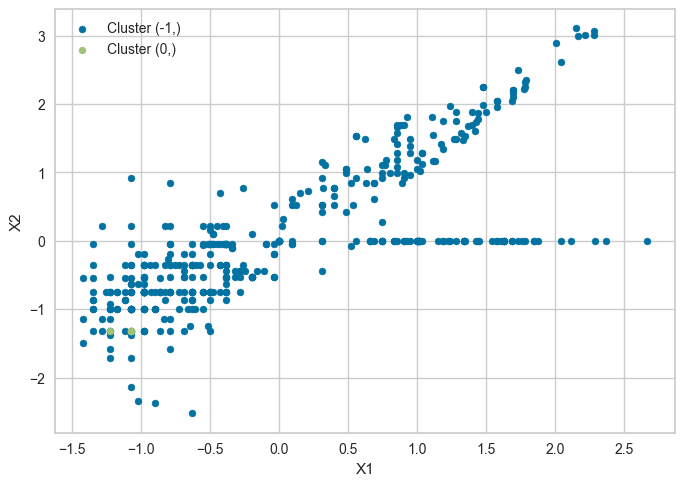

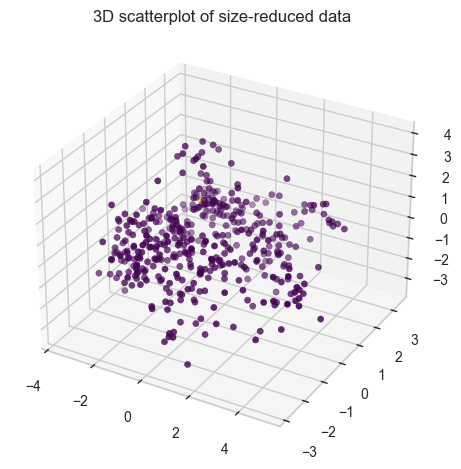

In [322]:


dbscan_optimal = DBSCAN()
pred_dbscan = dbscan_optimal.fit_predict(features_std)

printResult(pred_dbscan, features_std, None)

print3D(pred_dbscan, features_std)

#po brojke ovaj najbolji hahaha

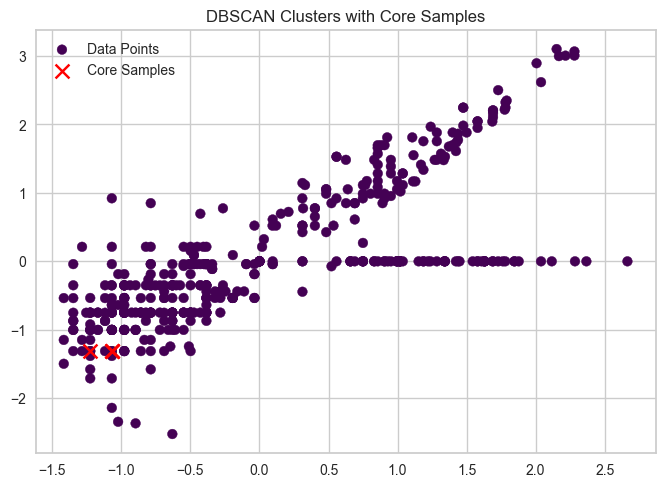

In [323]:
core_samples_mask = np.zeros_like(pred_dbscan, dtype=bool)
core_samples_mask[dbscan_optimal.core_sample_indices_] = True

# Extract core samples
core_samples = features_std[core_samples_mask]

plt.scatter(features_std[:, 0], features_std[:, 1], c=pred_dbscan, cmap='viridis', marker='o', label='Data Points')
plt.scatter(core_samples[:, 0], core_samples[:, 1], c='red', marker='x', s=100, label='Core Samples')
plt.title('DBSCAN Clusters with Core Samples')
plt.legend()
plt.show()



ovo je neki advanced scoring

In [324]:
# ovo sa prepisala treba izmeniti

scaler=StandardScaler()
features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=5)
dbscan = DBSCAN(eps=0.3)
# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)

print("Kmeans sillhouette: "+str(kmeans_silhouette))
print("Dbscan silhouette: "+str(dbscan_silhouette))

ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)
print("ARI statistika kmeans: " +str(round(ari_kmeans, 2)))
print("Ari statistika dbscan: "+str(round(ari_dbscan, 2)))# Unlike the silhouette coefficient,
# the ARI uses true cluster assignments to measure the similarity between true and predicted labels.

Kmeans sillhouette: 0.44
Dbscan silhouette: 0.38
ARI statistika kmeans: 0.25
Ari statistika dbscan: 1.0


### Agglomerative clustering

Elbow Method to determine the number of clusters to be formed:


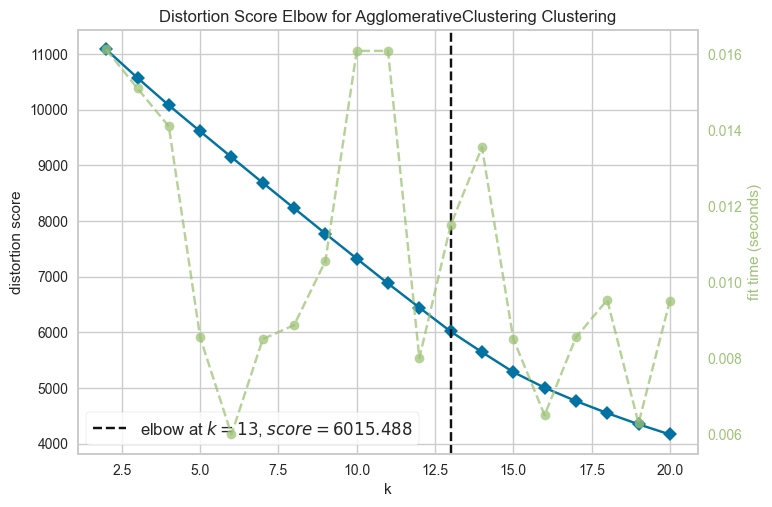

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [325]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=20)
Elbow_M.fit(features_std)
Elbow_M.show()

calinski_harabasz_score 34.69026360169294
Silhouette score:  0.2039476069813026
Davies-Bouldin score:  1.2191914592968567


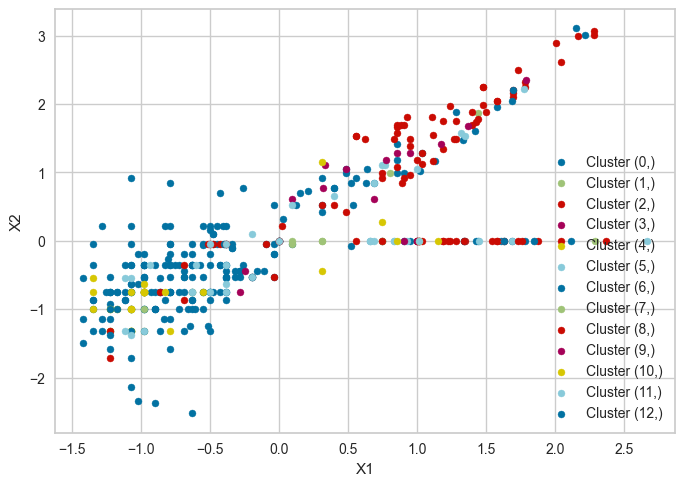

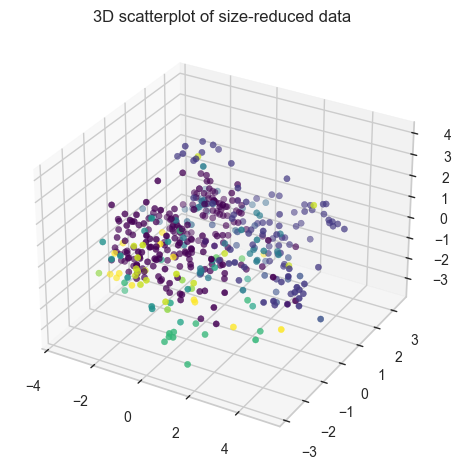

In [326]:

ac_model = AgglomerativeClustering(n_clusters=13, compute_distances=True)
ac_pred = ac_model.fit_predict(features_std)

printResult(ac_pred, features_std, None)
print3D(ac_pred, features_std)


- Razmotriti primenu tehnika za redukciju dimenzionalnosti.

- Obratiti pažnju na mogućnost pojave outlier-a u podacima i razmotriti tehnike za njihovu obradu.

- Izvršiti analizu dobijenih rezultata i pripremti detaljnu diskusiju.

In [327]:
# LIK je dobio 1768.413053339292 za CHALINSKI SCORE, NAMA 30 MAX

### Data reduction with PCA

In [331]:

pca = PCA(n_components=3, random_state=80)
pca.fit(features_std)
data_pca = pd.DataFrame(pca.transform(features_std), columns=(["f1","f2", "f3"]))
pca.explained_variance_ratio_.cumsum()


array([0.13345104, 0.21033983, 0.26696025])

### KMeans

Elbow Method to determine the number of clusters to be formed:


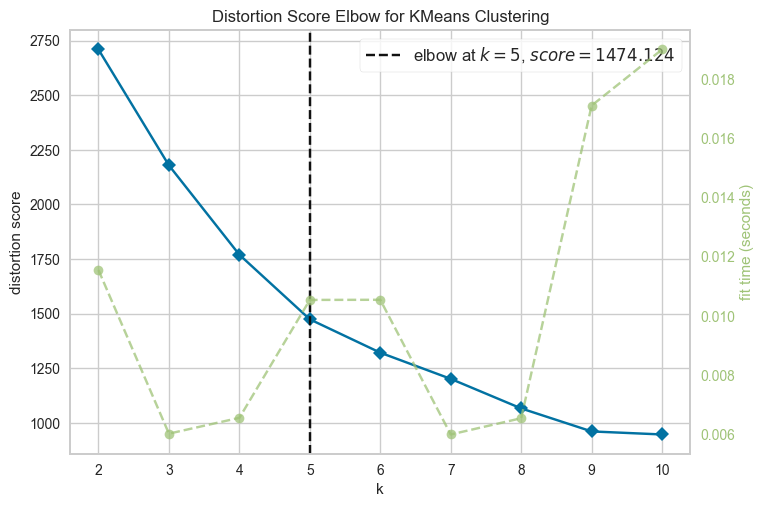

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [329]:

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_pca)
Elbow_M.show()


calinski_harabasz_score 228.81233355614887
Silhouette score:  0.31433903689284703
Davies-Bouldin score:  1.0258578069164113


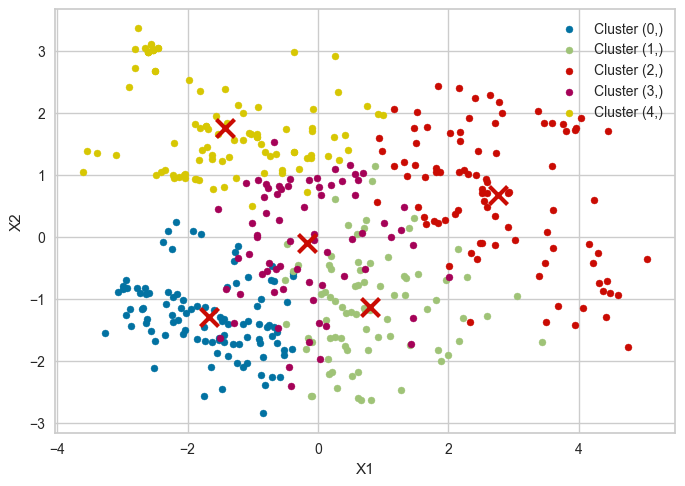

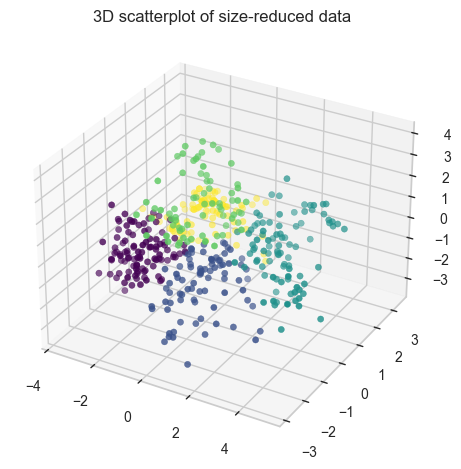

In [383]:

kmeans_pca = KMeans(n_clusters=5, n_init=50, init='k-means++', max_iter=500).fit(data_pca)
pred_kmeans_pca = kmeans_pca.predict(data_pca)
claster_center_kmeans_pca = kmeans_pca.cluster_centers_

labels = kmeans.labels_

printResult(pred_kmeans_pca, data_pca.values,claster_center_kmeans_pca )

print3D(pred_kmeans_pca, data_pca)

### Mean shift

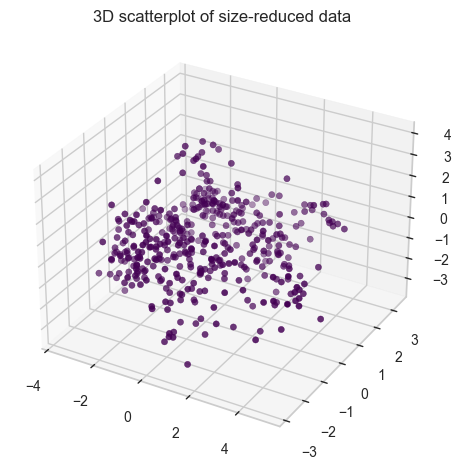

In [387]:
mean_shift_pca = MeanShift().fit(data_pca)

pred_means_pca = mean_shift_pca.predict(data_pca)

claster_center_mean_s_pca = mean_shift_pca.cluster_centers_

pred_means_pca
# proveriti koliko klastera ima 
# printResult(pred_means_pca, data_pca.values, claster_center_mean_s_pca )

print3D(pred_means_pca, data_pca)


### DBSCAN

calinski_harabasz_score 24.46690147192612
Silhouette score:  -0.08484961423096496
Davies-Bouldin score:  1.5331247667719292


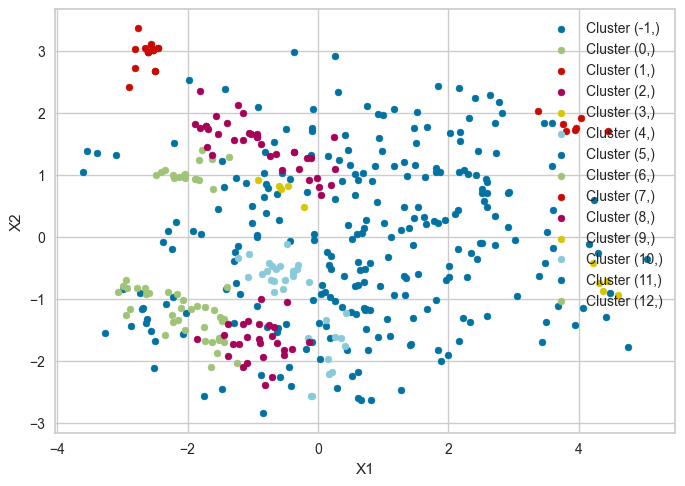

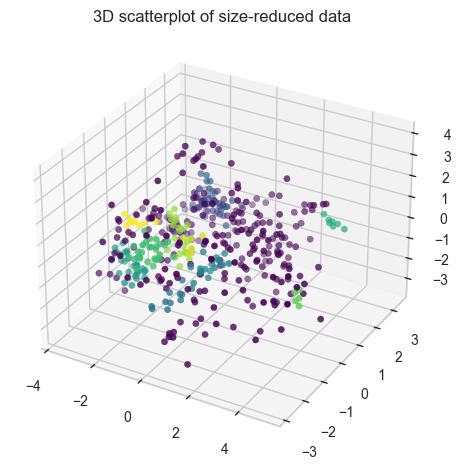

In [388]:

dbscan_optimal_pca = DBSCAN()
pred_dbscan_pca = dbscan_optimal_pca.fit_predict(data_pca)

printResult(pred_dbscan_pca, data_pca.values, None )
print3D(pred_dbscan_pca, data_pca)

### agro

Elbow Method to determine the number of clusters to be formed:


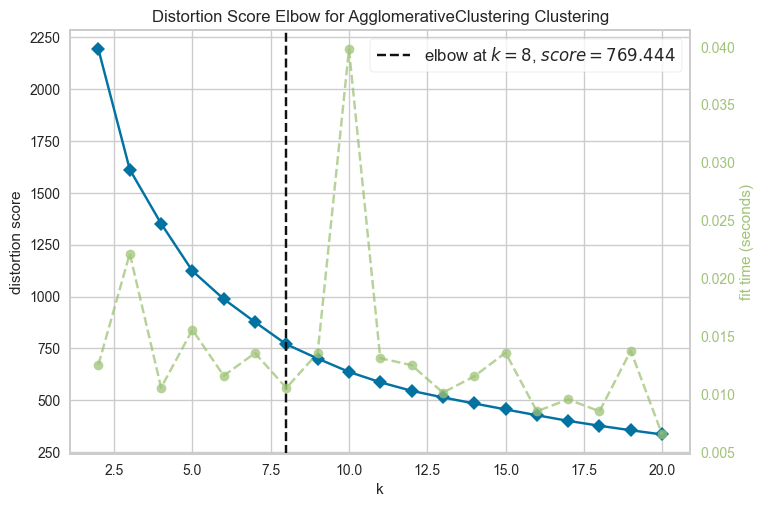

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [372]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=20)
Elbow_M.fit(data_pca)
Elbow_M.show()


calinski_harabasz_score 192.65898430496878
Silhouette score:  0.2642989405877365
Davies-Bouldin score:  1.0524341544376439


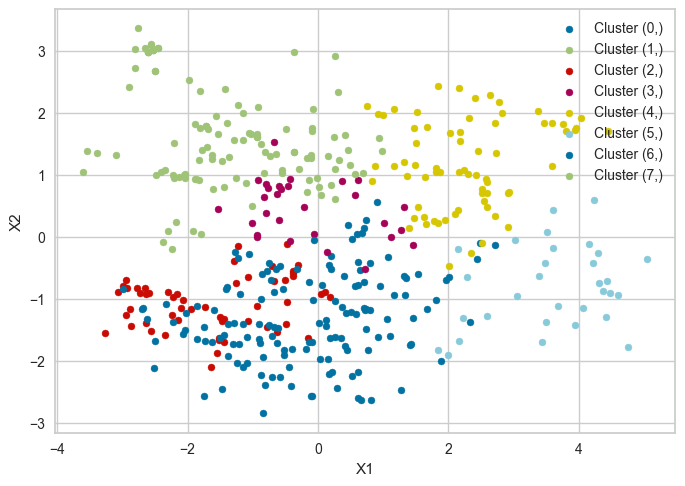

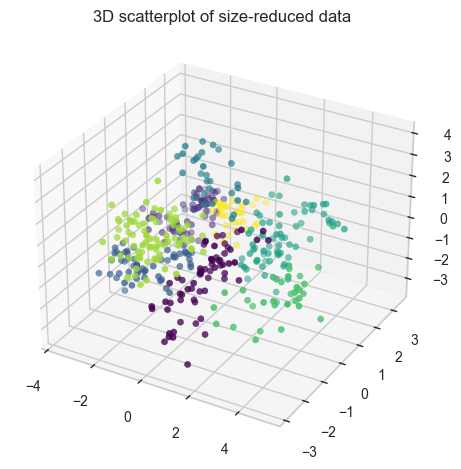

In [389]:

ac_model_pca = AgglomerativeClustering(n_clusters=8, compute_distances=True)
ac_pred_pca = ac_model_pca.fit_predict(data_pca)

printResult(ac_pred_pca, data_pca.values, None )
print3D(ac_pred_pca, data_pca)